In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
import numpy as np
import math as ma

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import astropy 

import loadSP as lsp
import cosmo
import halos

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 32
mpl.rcParams['agg.path.chunksize'] = 10000

import gc

In [2]:
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')
logformatter = FuncFormatter(log_formatter)

nullfmt = NullFormatter()

In [3]:
z = 9.5
num = 84 # This is the output_00num file that has the "info_" for finding the boxsize... see map above.
boxsizecm = lsp.getBoxSize(num,"/Users/earnric/Research/RAMSES-Data/27Aug15-3Mpc/")

In [4]:
locs, mass, bt, Z, PZ, PPF = lsp.loadSP(z)

In [5]:
baseAge = cosmo.ageAtz(71,z) # ageAtZ return Myr, parameters are H and z
ages = baseAge - bt/1e6
print("min sp age {:.2f} Myr".format(min(ages)))
print("max sp age {:.2f} Myr".format(max(ages)))

min sp age 1.51 Myr
max sp age 323.27 Myr


In [6]:
##
## Load the halo locations
##
halosRawPos = lsp.loadHaloGrps(num)
halosRawPos = halosRawPos[0:300] # Only get the first 300 halos... 
tbox = boxsizecm/lsp.cmInPc/1000.0 # Convert cm to kpc
print("boxsize at z=%.2f is %.2f kpc"%(z,tbox))
halosPos = halosRawPos * tbox
len(halosRawPos)

boxsize at z=9.50 is 401.64 kpc


300

In [31]:
fpol = (1.0 - PPF)
fpol[fpol < 1.e-5] = 0
print(fpol.max(),fpol[fpol>0.0].min())

1.0 1.00187168971e-05


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


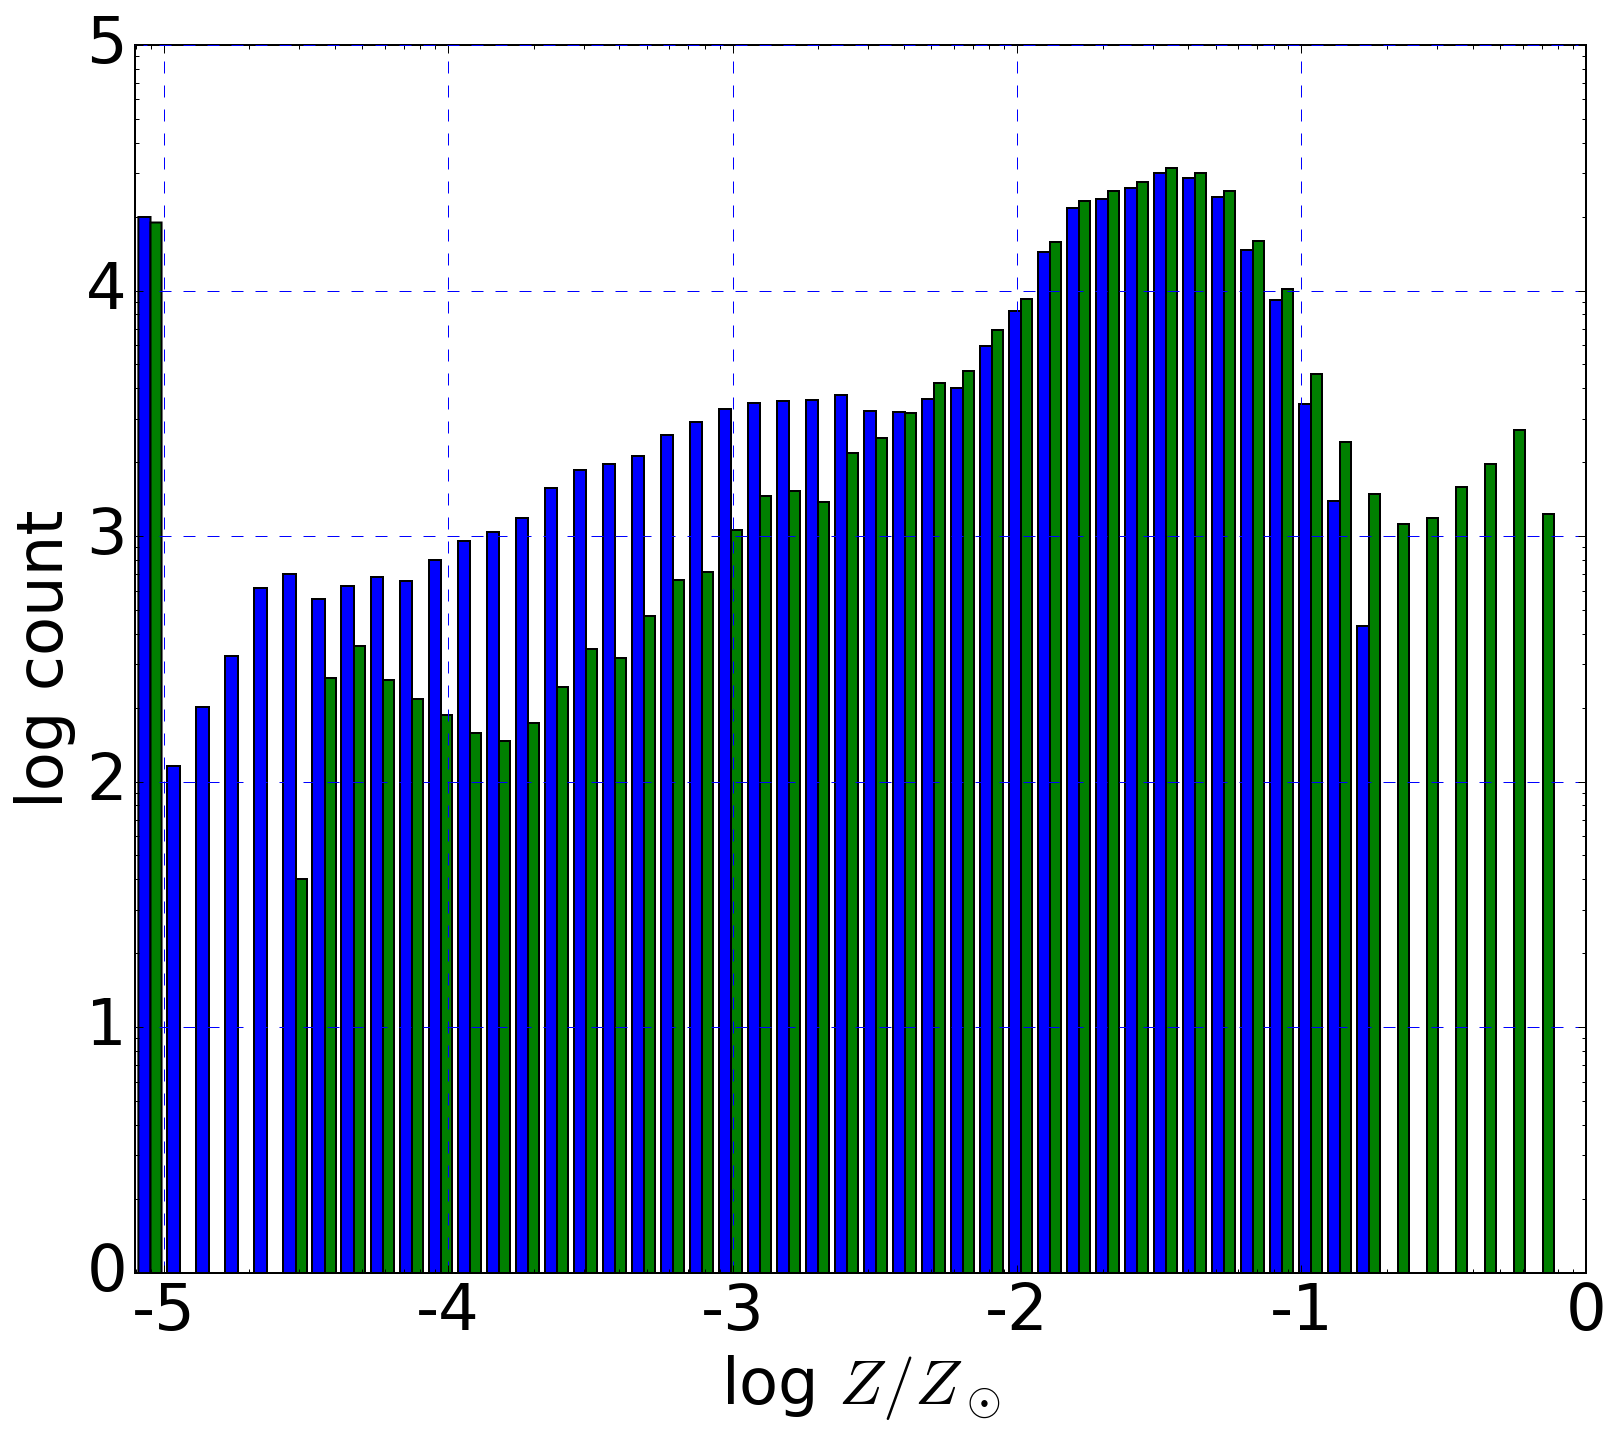

In [34]:
ZBins = np.logspace(-5.1,0,51)

Zfixed = Z
Zcorrected = (Z*0.02)/fpol # Make sure we convert to mass fraction before correcting!
Zcorrected /= 0.02         # Back to solar units... 
Zcorrected[np.isinf(Zcorrected)] = 10**-5.1
Zfixed[Zfixed < 1e-5] = 10**-5.1
fig = plt.figure()
ax = fig.gca()
ax.hist([Zfixed,Zcorrected],bins=ZBins)
#ax.hist(Zcorrected,bins=ZBins)
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='b', linestyle='--')
#ax.set_ylim([5e-6,1])
ax.set_xlim([10**-5.1,1])

ax.set_xlabel(r'log $Z/Z_\odot$')
ax.set_ylabel(r'log count')

In [42]:
print(mass.size,Z.size)

284963 284963


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


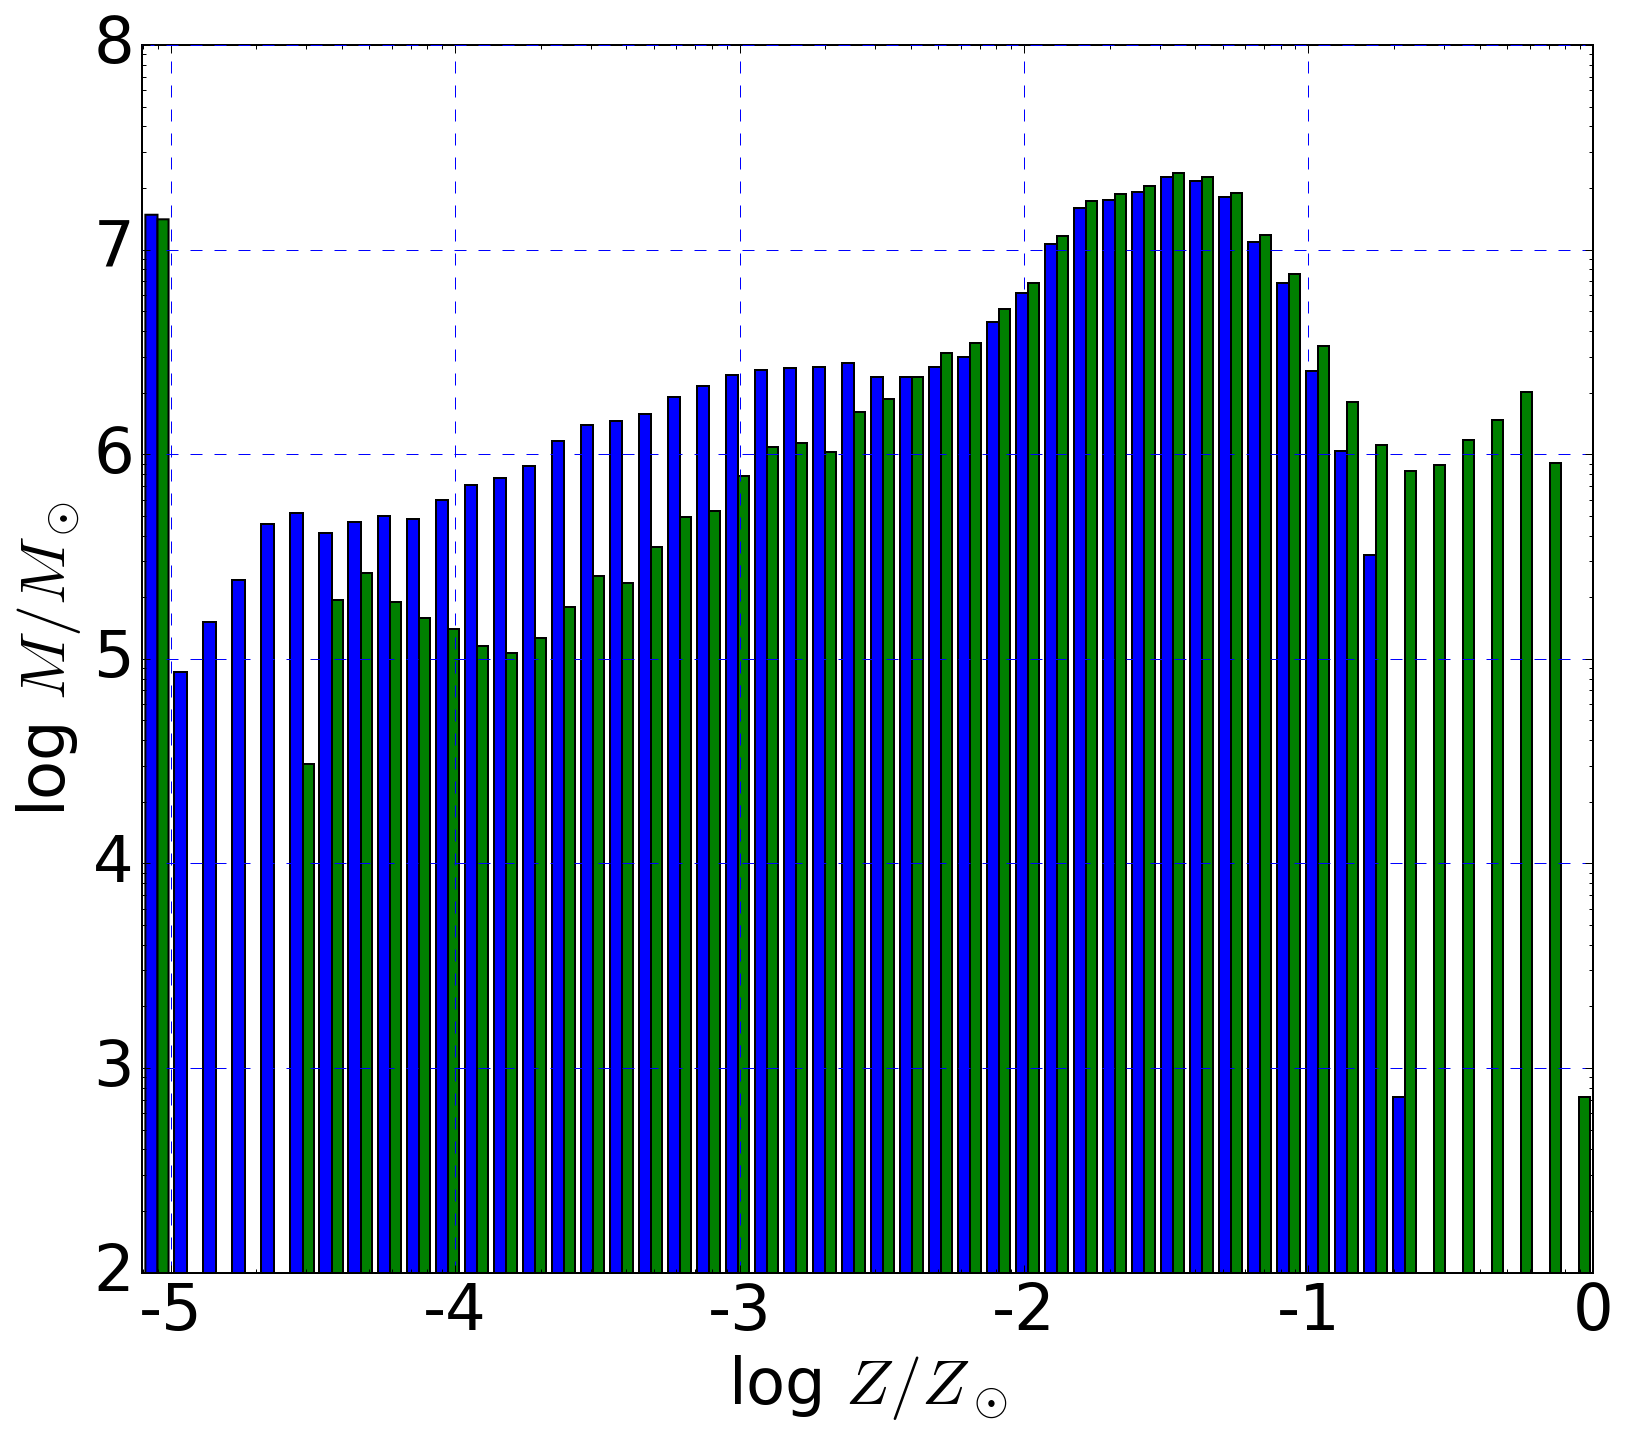

In [44]:
ZBins = np.logspace(-5.1,0,51)

Zfixed = Z
Zcorrected = (Z*0.02)/fpol # Make sure we convert to mass fraction before correcting!
Zcorrected /= 0.02         # Back to solar units... 
Zcorrected[np.isinf(Zcorrected)] = 10**-5.1
Zfixed[Zfixed < 1e-5] = 10**-5.1
fig = plt.figure()
ax = fig.gca()
ax.hist([Zfixed,Zcorrected],bins=ZBins,weights=[mass,mass])
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='b', linestyle='--')
#ax.set_ylim([5e-6,1])
ax.set_xlim([10**-5.1,1])

ax.set_xlabel(r'log $Z/Z_\odot$')
ax.set_ylabel(r'log $M/M_\odot$')

Age of universe 522.4 Myr


(10, 1000)

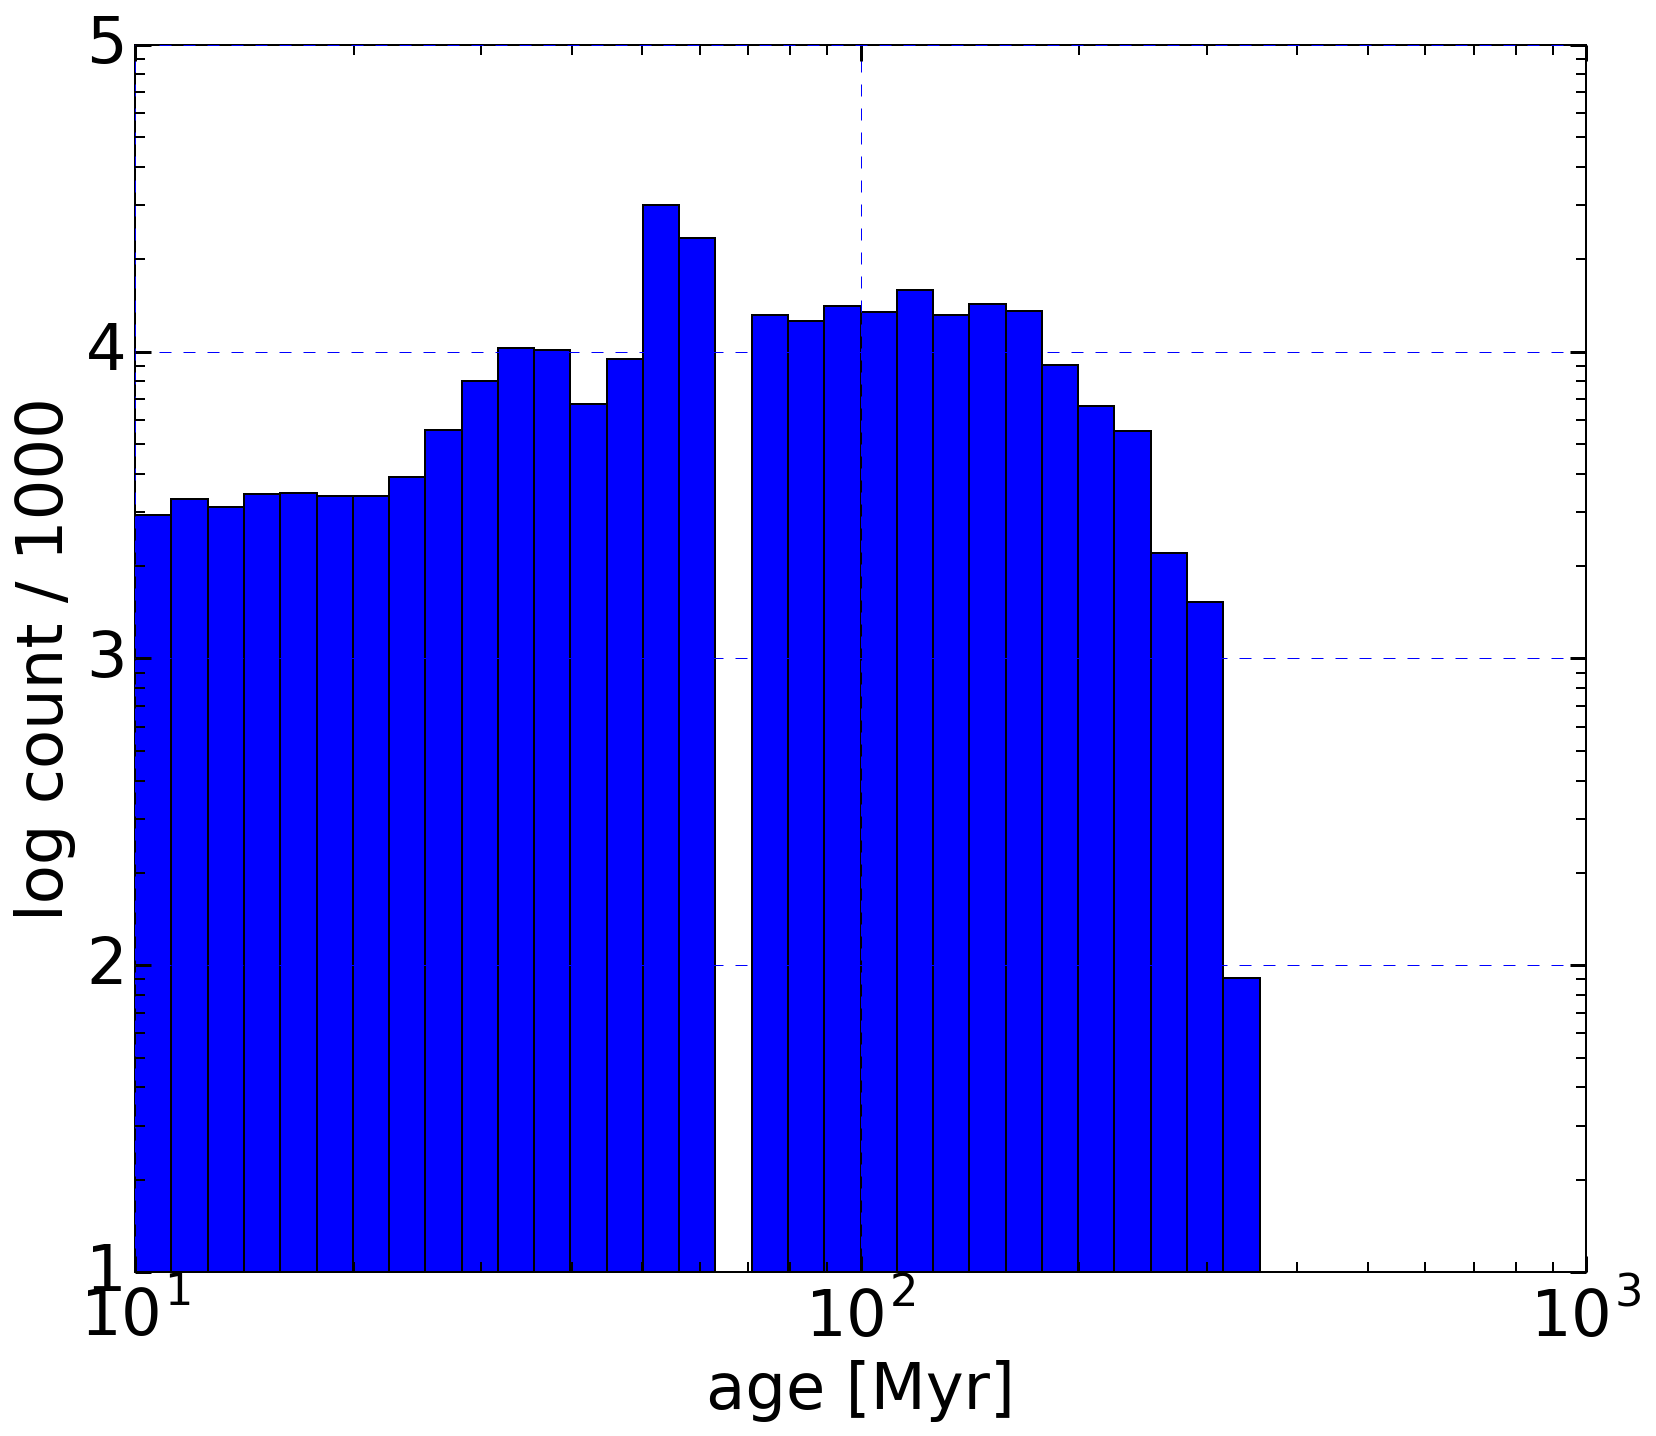

In [10]:
print("Age of universe {:.1f} Myr".format(baseAge))
ageBins = np.logspace(0,3,61) # TO match the SEDs we have from Schaerer, use 0.05 dex steps
#ageBins = np.linspace(10,900,20)
fig = plt.figure()
ax = fig.gca()
n, bins, patches = ax.hist(ages,bins=ageBins)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.tick_params('both', length=5, width=1, which='minor')
ax.tick_params('both', length=8, width=1.5, which='major')

ax.set_xlabel('age [Myr]')
ax.set_ylabel(r'log count / 1000')

ax.set_xlim([10,1000])

In [14]:
min(ages)

1.2433390104014279

Age of universe 559.7 Myr


(10, 1000)

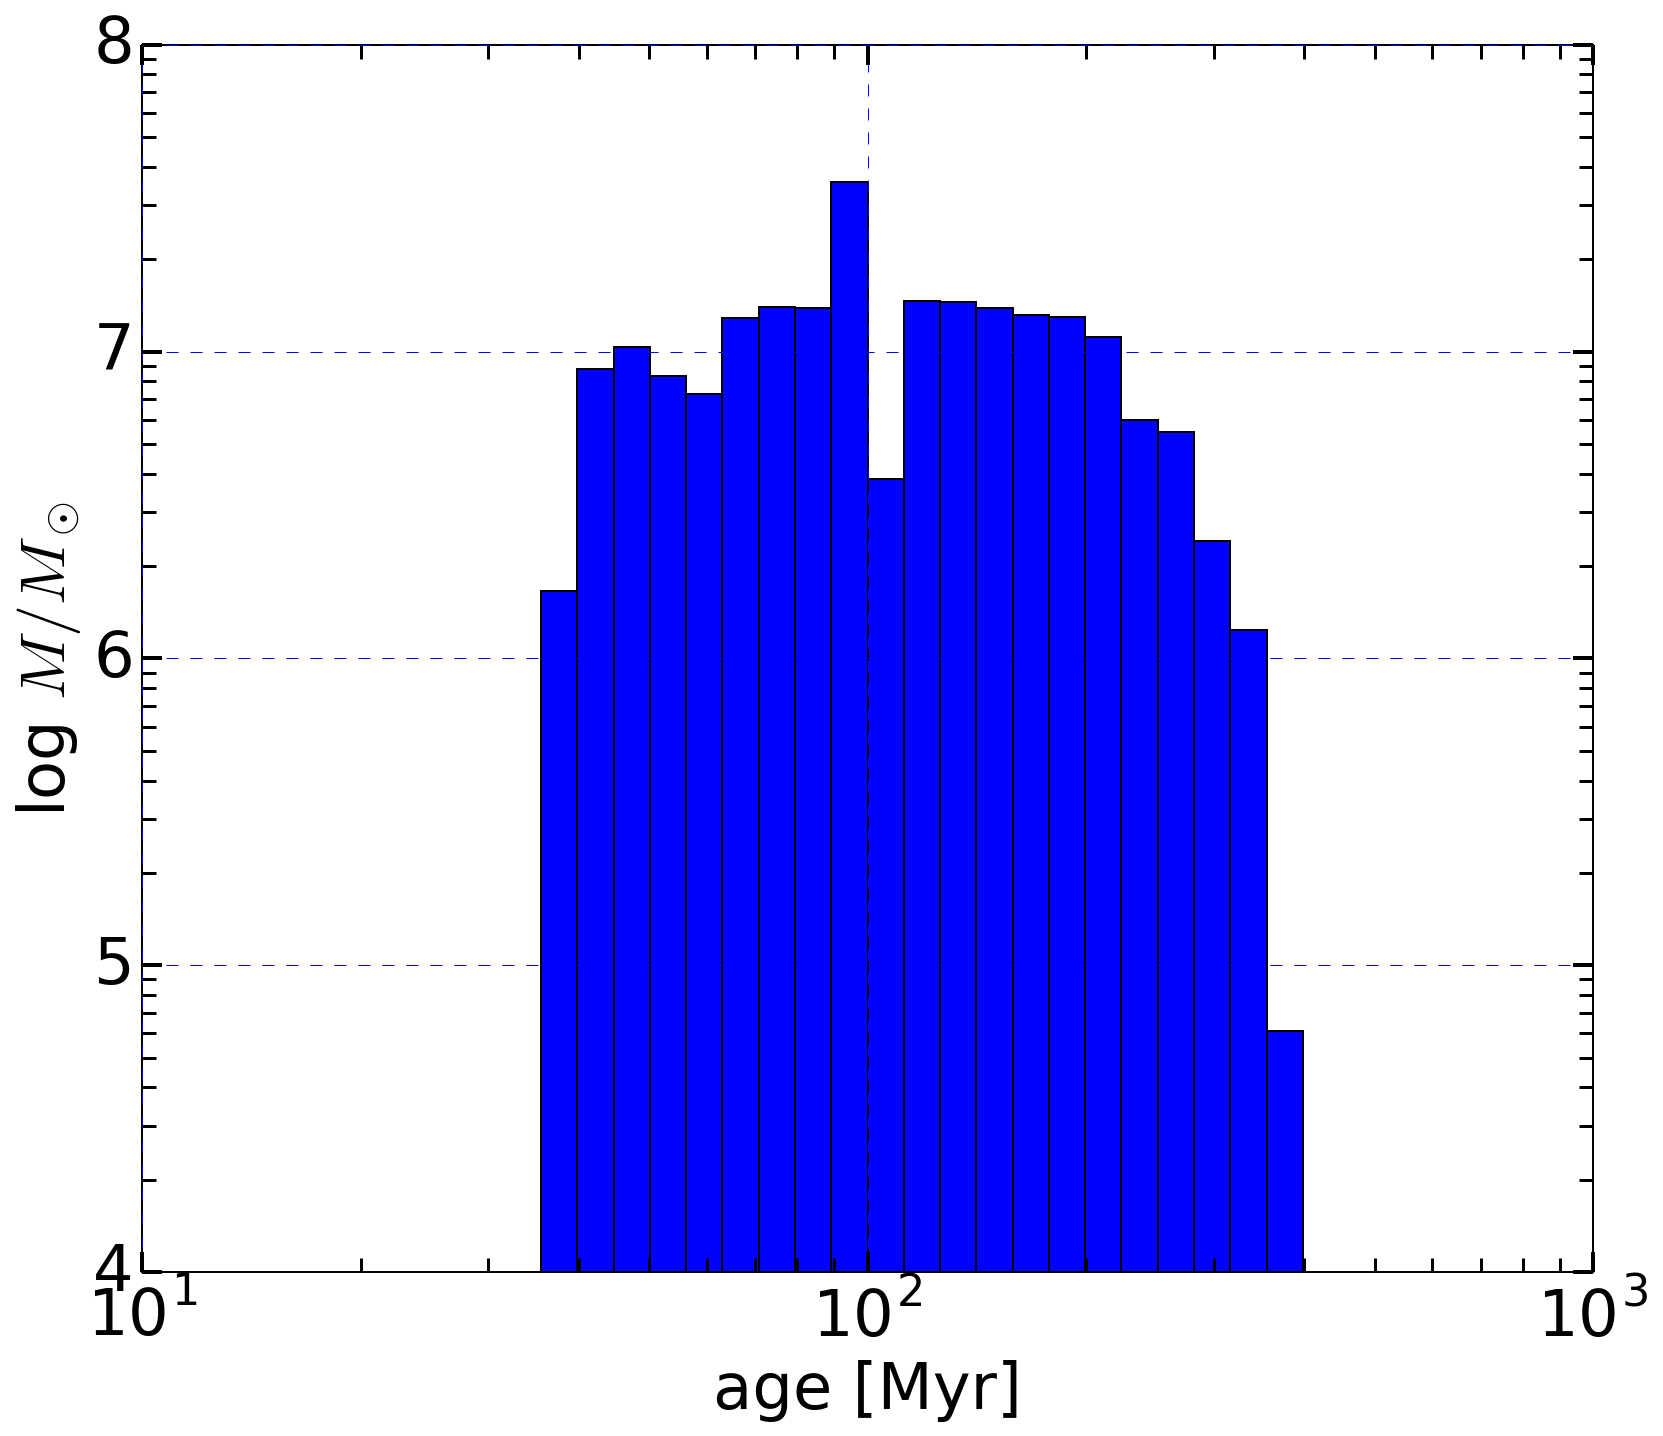

In [104]:
print("Age of universe {:.1f} Myr".format(baseAge))
ageBins = np.logspace(0,3,61) # TO match the SEDs we have from Schaerer, use 0.05 dex steps
#ageBins = np.linspace(10,900,20)
fig = plt.figure()
ax = fig.gca()
n, bins, patches = ax.hist(ages,bins=ageBins, weights=mass)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.tick_params('both', length=7, width=1.5, which='minor')
ax.tick_params('both', length=10, width=2, which='major')

ax.set_xlabel('age [Myr]')
ax.set_ylabel(r'log $M/M_\odot$')

ax.set_xlim([10,1000])

In [108]:
# This is the binning we need.

In [11]:
z

12

Age of universe 522.4 Myr


/Users/earnric/.conda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


(6.30957344480193e-06, 1)

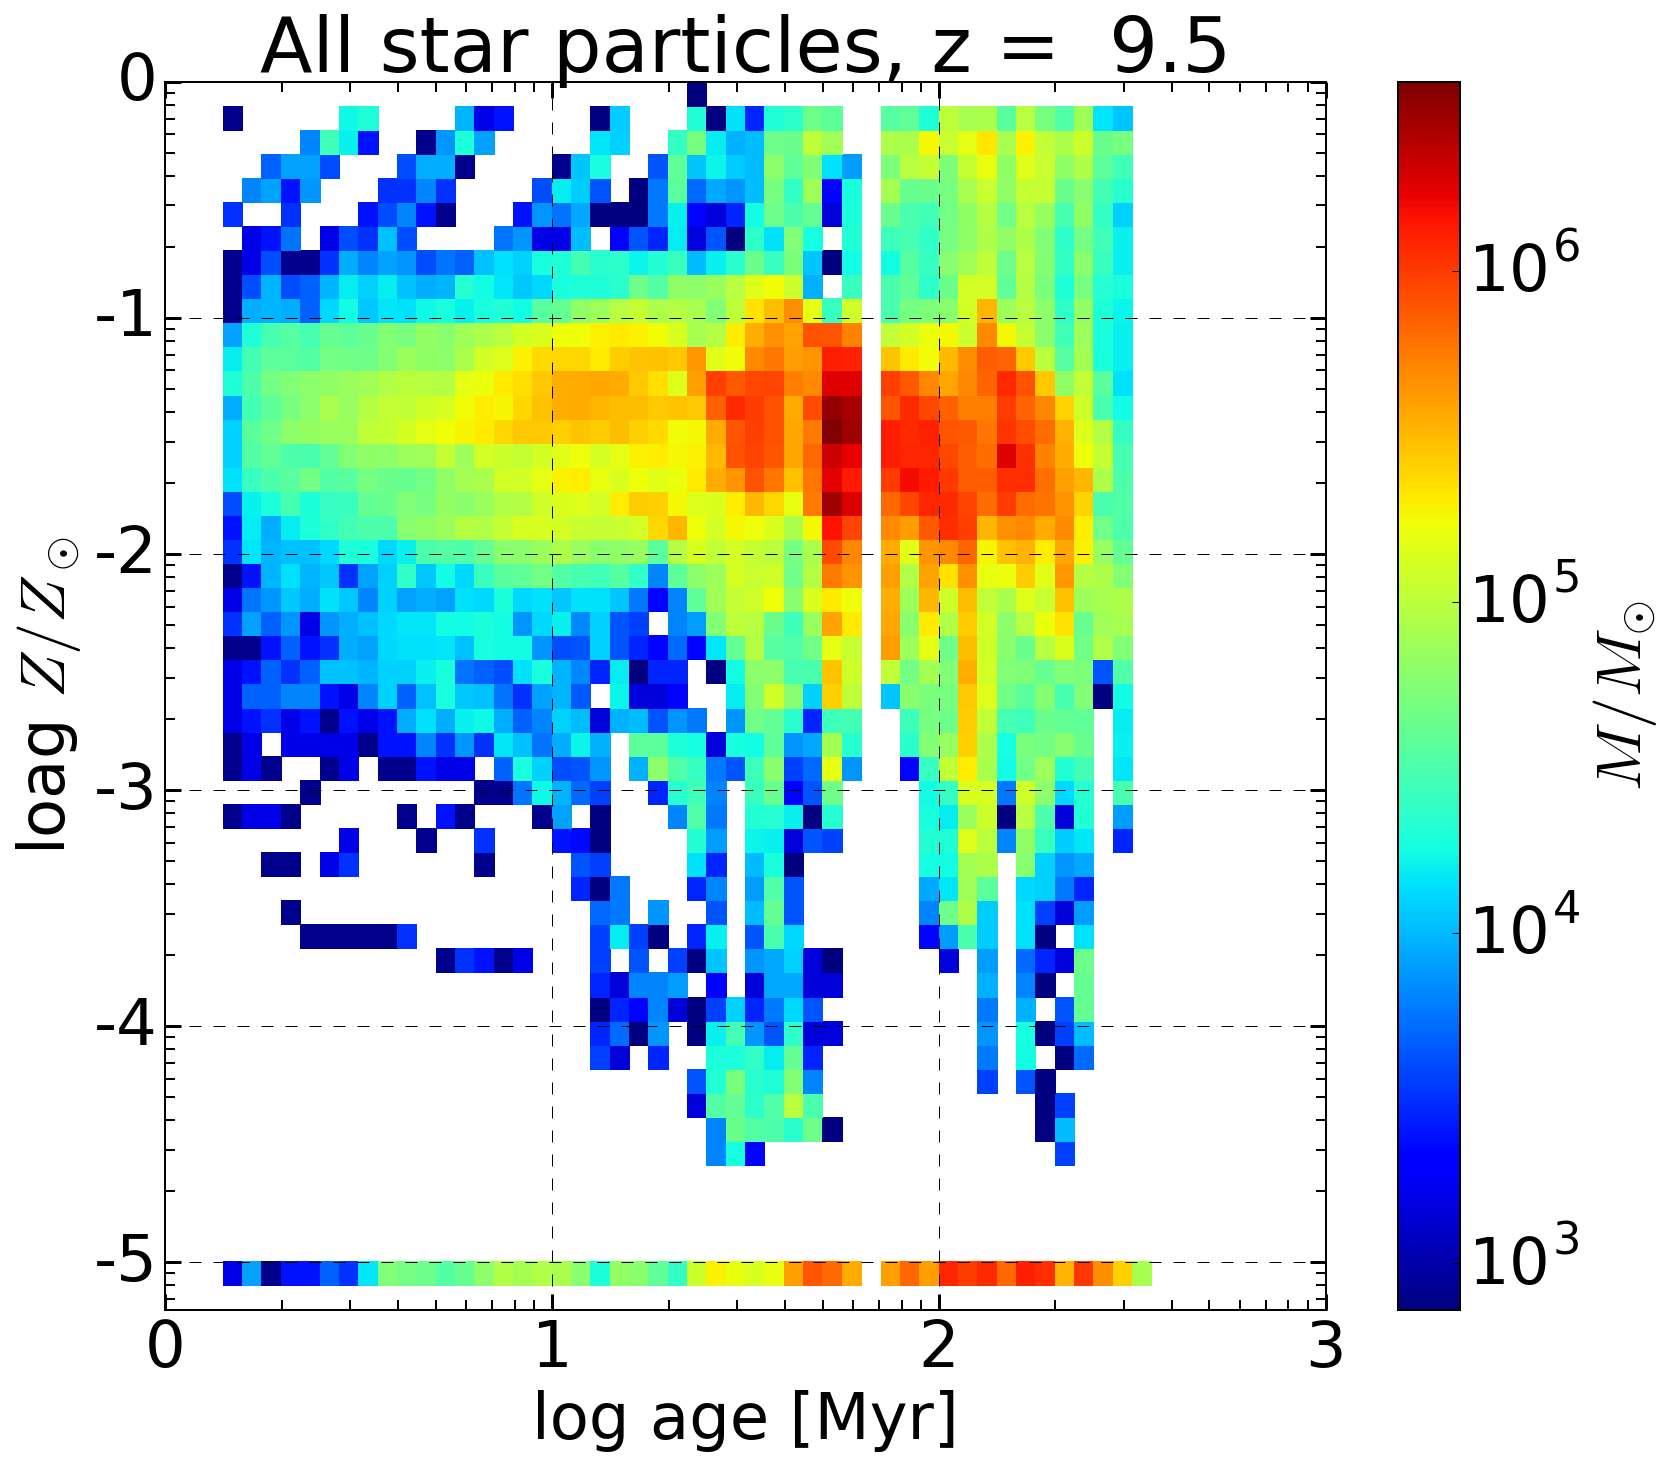

In [46]:
print("Age of universe {:.1f} Myr".format(baseAge))
## USING THE CORRECTED METALLICITY ##
ageBins = np.logspace(0,3,61) # match the SEDs we have from Schaerer, use 0.05 dex steps
ZBins   = np.logspace(-6,0,19)

ZBins = np.logspace(-5.1,0,51)

Zfixed = Z
Zcorrected = (Z*0.02)/fpol # Make sure we convert to mass fraction before correcting!
Zcorrected /= 0.02         # Back to solar units... 
Zcorrected[np.isinf(Zcorrected)] = 10**-5.1
Zfixed[Zfixed < 1e-5] = 10**-5.1

fig = plt.figure()
ax = fig.gca()
# Can't use matplotlib with log axis... is screws it up.
# n, aBins, metBins, image = ax.hist2d(ages,Zfixed,bins=(ageBins,ZBins),norm=LogNorm(),
#                                    weights=mass)
# Need to use numpy...
n, aBins, metBins = np.histogram2d(Zcorrected,ages,bins=(ZBins,ageBins),
                                        weights=mass)
histax = ax.pcolormesh(ageBins, ZBins, n, norm=LogNorm())
cbar = fig.colorbar(histax)
#cbar.ax.set_yticklabels(cbarticks, size=24)
cbar.set_label('$M/M_{\odot}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='k', linestyle='--')
ax.tick_params('both', length=5, width=1, which='minor')
ax.tick_params('both', length=8, width=1.5, which='major')

ax.set_xlabel(r'log age [Myr]')
ax.set_ylabel(r'loag $Z/Z_\odot$')
ax.set_title('All star particles, z = {:4.1f}'.format(z))

ax.set_xlim([1,1000])
ax.set_ylim([10**-5.2,1])

Age of universe 522.4 Myr


(5.011872336272725e-06, 1)

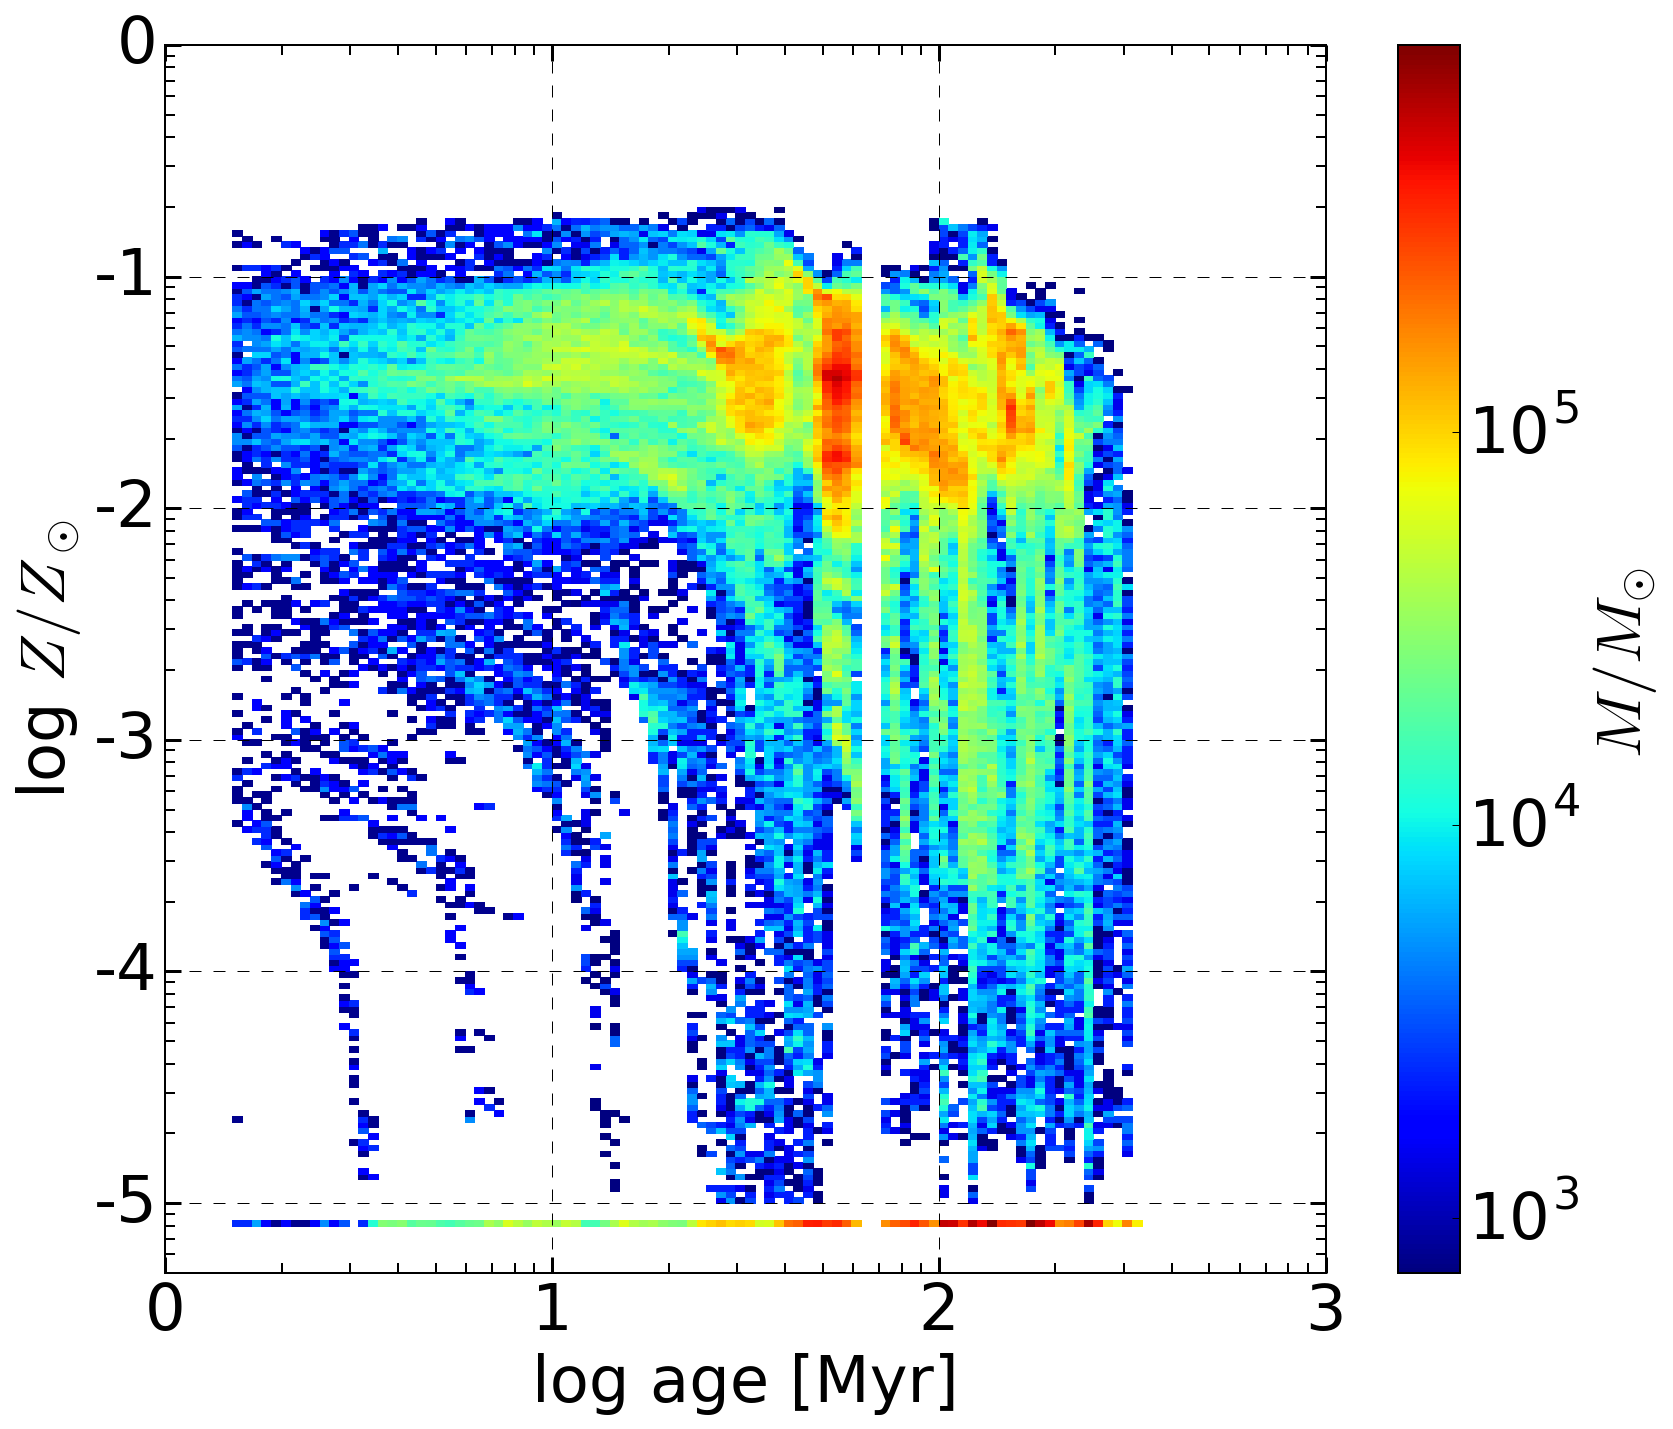

In [12]:
plt.rcParams['font.size'] = 32
print("Age of universe {:.1f} Myr".format(baseAge))

ageBins = np.logspace(0,3,121) # match the SEDs we have from Schaerer, use 0.05 dex steps
ZBins   = np.logspace(-6,0,241)

Zfixed = Z
Zfixed[Zfixed < 1e-5] = 10**-5.1

fig = plt.figure()
ax = fig.gca()
# Can't use matplotlib with log axis... is screws it up.
# n, aBins, metBins, image = ax.hist2d(ages,Zfixed,bins=(ageBins,ZBins),norm=LogNorm(),
#                                    weights=mass)
# Need to use numpy...
n, aBins, metBins = np.histogram2d(Zfixed,ages,bins=(ZBins,ageBins),
                                        weights=mass)
histax = ax.pcolormesh(ageBins, ZBins, n, norm=LogNorm())
cbar = fig.colorbar(histax)
#cbar.ax.set_yticklabels(cbarticks, size=24)
cbar.set_label('$M/M_{\odot}$ ')
# Or... 
# cax = fig.add_axes([0.915, 0.55, 0.015, 0.35])
# fig.colorbar(histax, cax=cax, label="$M/M_\odot$")
# To control position

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(logformatter)
ax.yaxis.set_major_formatter(logformatter)
ax.grid(b=True, which='major', color='k', linestyle='--')
ax.tick_params('both', length=5, width=1, which='minor')
ax.tick_params('both', length=8, width=1.5, which='major')

ax.set_title('All star particles, z = {:4.1f}'.format(z))

ax.set_xlabel(r'log age [Myr]')
ax.set_ylabel(r'log $Z/Z_\odot$')

ax.set_xlim([1,1000])
ax.set_ylim([10**-5.3,1])



# Check out the halos... 

In [13]:
# Setup the cosmology used in the runs
# This provides comoving distance, lumin distance, etc... 
# THis is Seth's cosmology
astroPyCosmo = FlatLambdaCDM(H0=71.0, Om0=0.24, Ob0=0.0449,name='myCosmo')

In [14]:
arcPerKpc = astroPyCosmo.arcsec_per_kpc_comoving(z=9.5)
print('Comoving:',arcPerKpc)
arcPerKpc = astroPyCosmo.arcsec_per_kpc_proper(z=9.5)
print('Proper:',arcPerKpc)


Comoving: 0.020734679928940715 arcsec / kpc
Proper: 0.21771413925387748 arcsec / kpc


In [15]:
kpcPerArcSec = cosmo.arcAtz(71,z=9.5,om=0.24, ol=1.0-0.24) # size of an arcsec at the specified reshift in kpc
print('Proper:',1.0 / kpcPerArcSec)


Proper: 0.21744697332907817


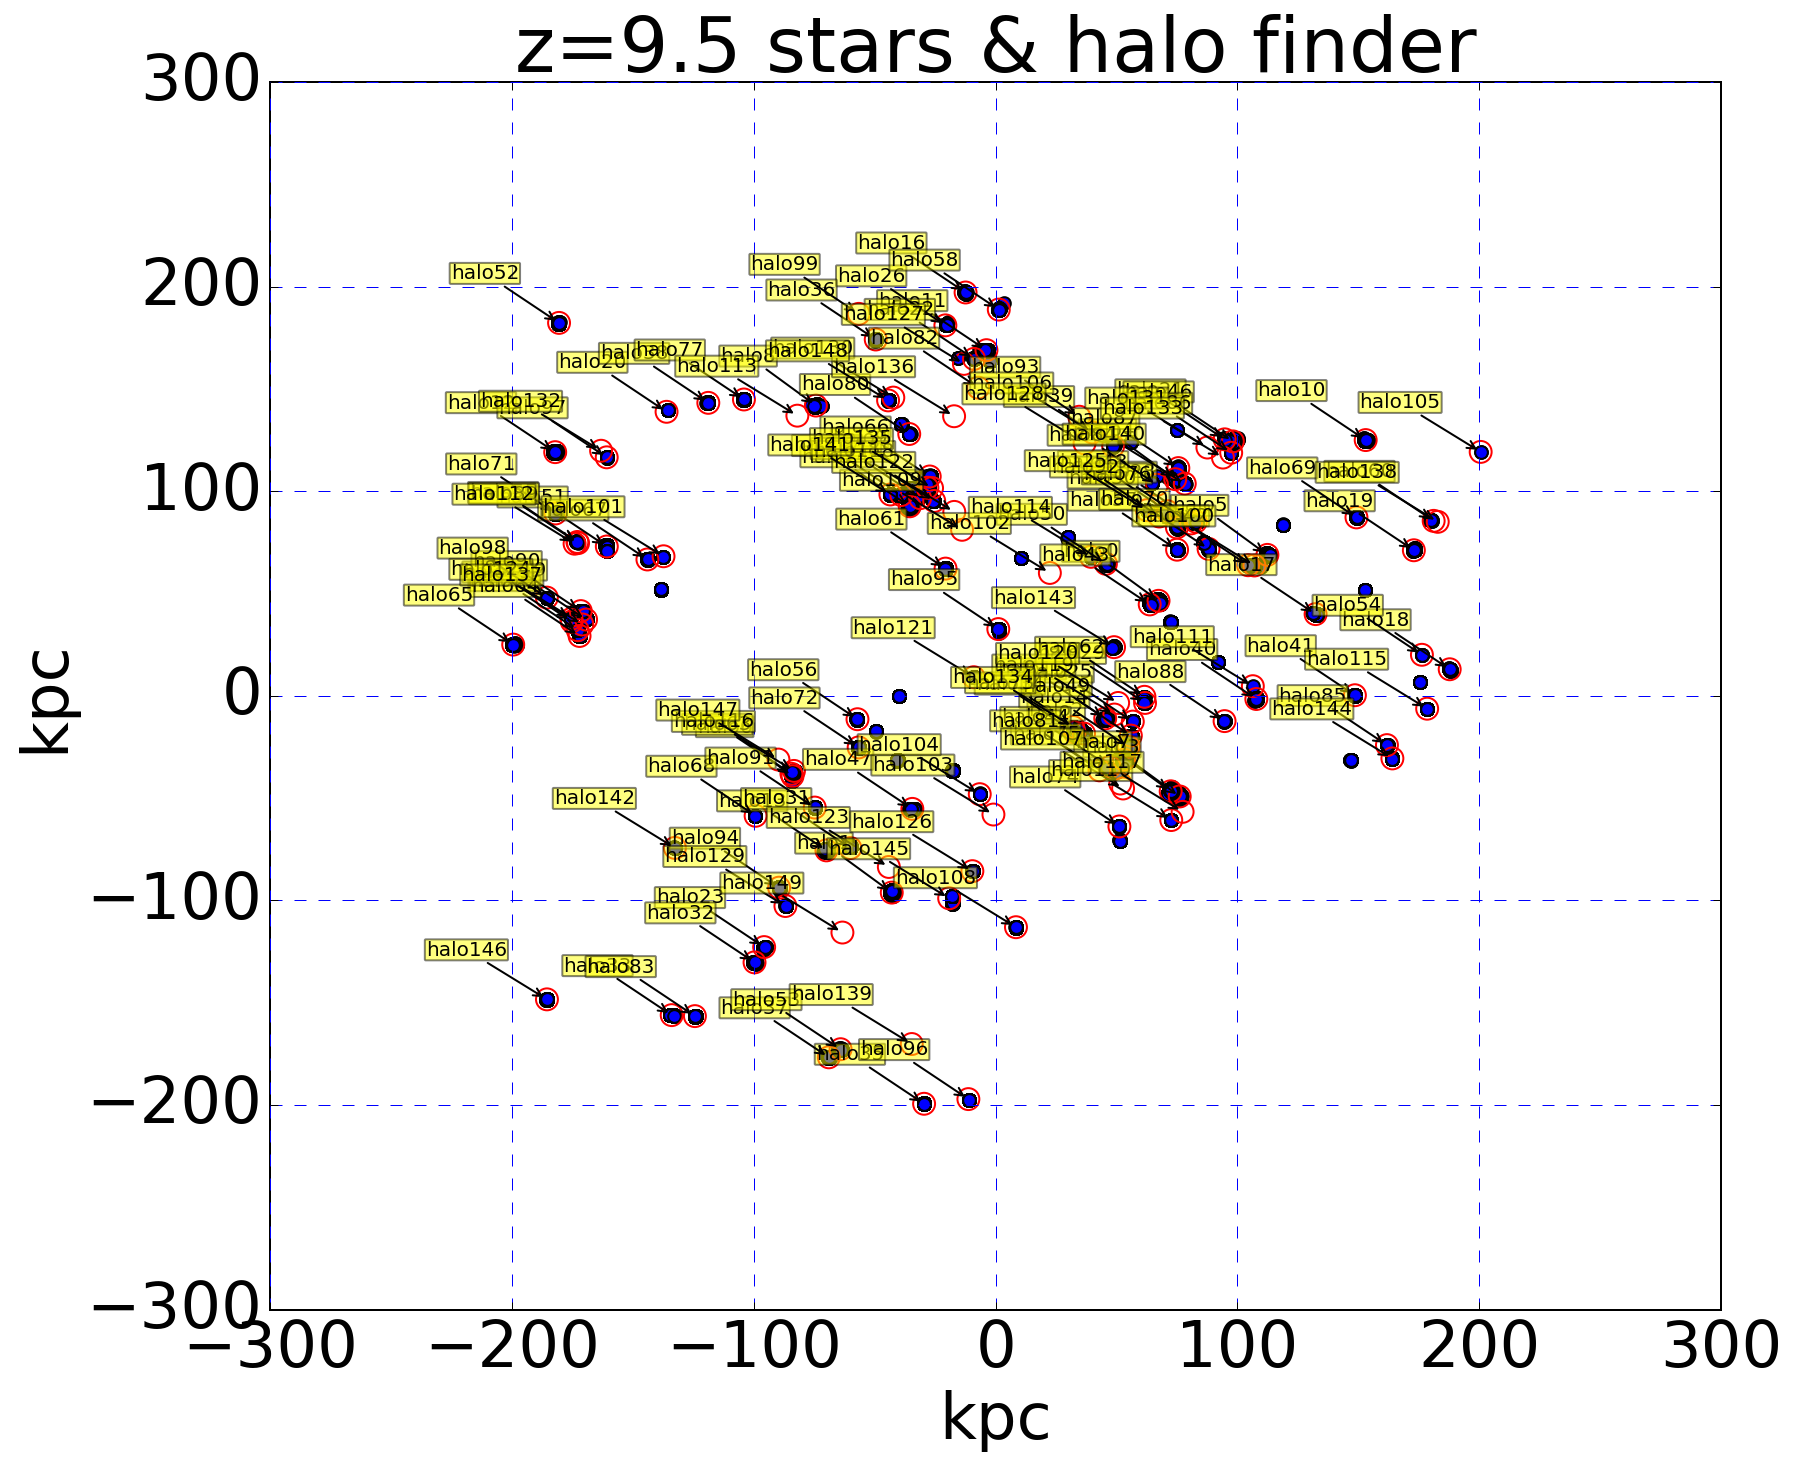

In [16]:
# Plot all the star particles, and all the halo center-of-masses from the halo-group files

htp = 150
labels = ['halo{0}'.format(i) for i in range(len(halosPos))]
plt.scatter(locs[:,0],locs[:,1],s=40,c='b') # Plot star particles
plt.scatter(halosPos[:htp,0],halosPos[:htp,1],s=120,facecolors='none', edgecolors='r') # Plot halo locs
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.title('z=%.1lf stars & halo finder'%z)
for label, x, y in zip(labels, halosPos[:htp,0],halosPos[:htp,1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

25102

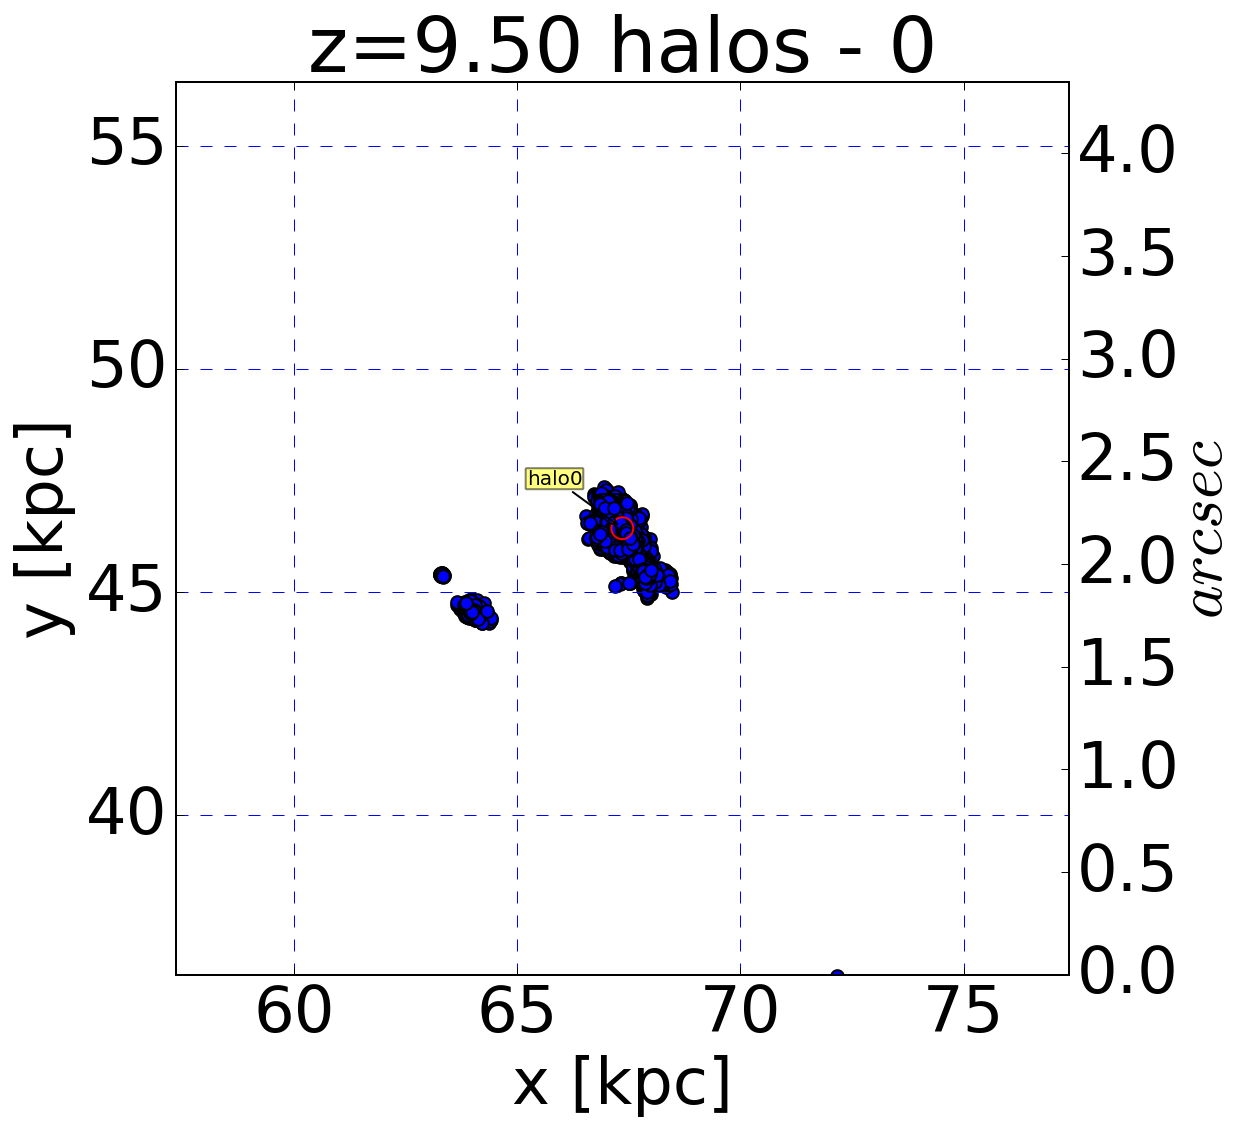

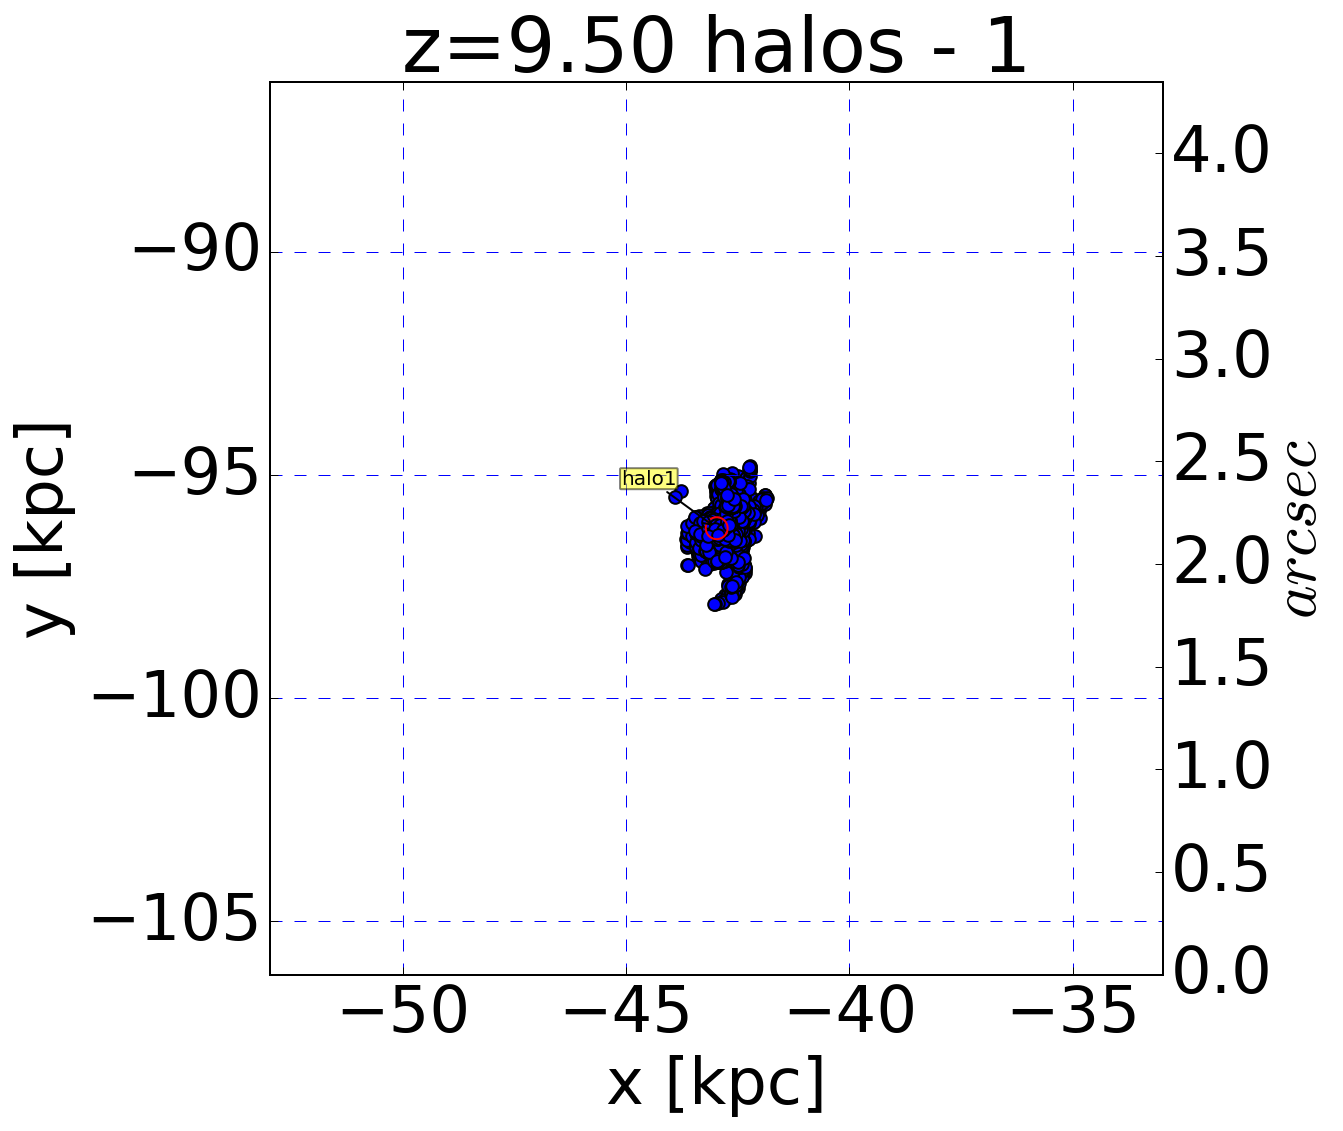

In [18]:
for halo in range(0,2):
    ax=halos.pltHalo(locs,halosPos,halo,z,20)
    hax2 = ax.twinx()
    hax2.set_ylim([0,20/kpcPerArcSec])
    hax2.set_ylabel(r'$arcsec$')
    hax2.yaxis.labelpad = -3
gc.collect()

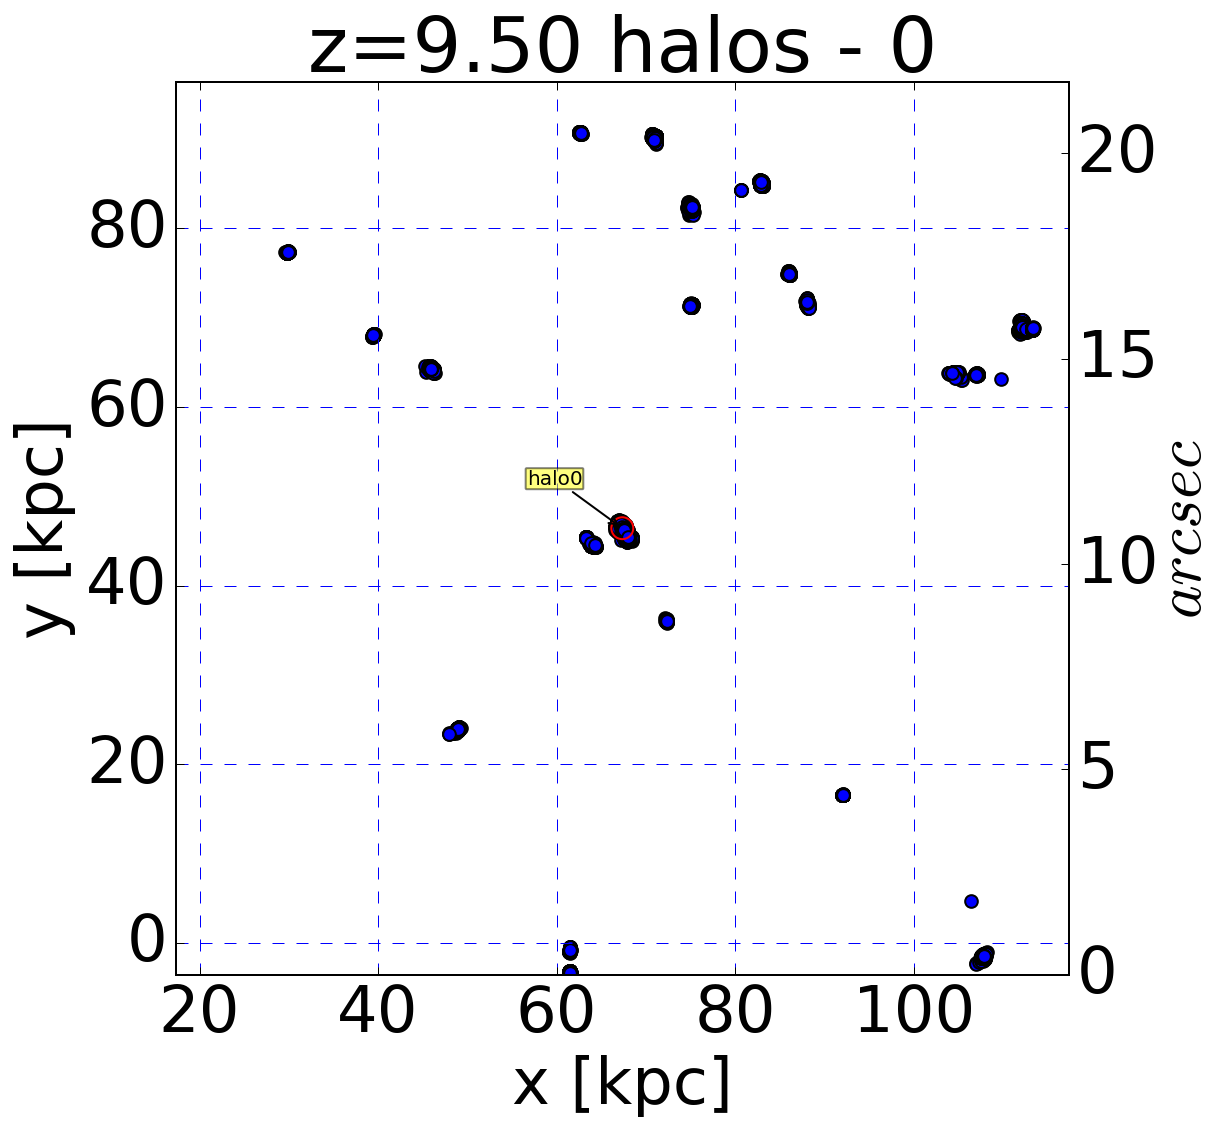

In [19]:
arcSec = cosmo.arcAtz(71,z) # size of an arcsec at the specified reshift in kpc
ax=halos.pltHalo(locs,halosPos,0,z,100)
hax2 = ax.twinx()
hax2.set_ylim([0,100/kpcPerArcSec])
hax2.set_ylabel(r'$arcsec$')
hax2.yaxis.labelpad = -3


In [13]:
import importlib 
importlib.reload(halos)
cosmo.arcAtz(70,6.6)

5.416002946016118

# Plot halo-specific histograms

In [141]:
np.log10(n.max())

6.6267329619835795

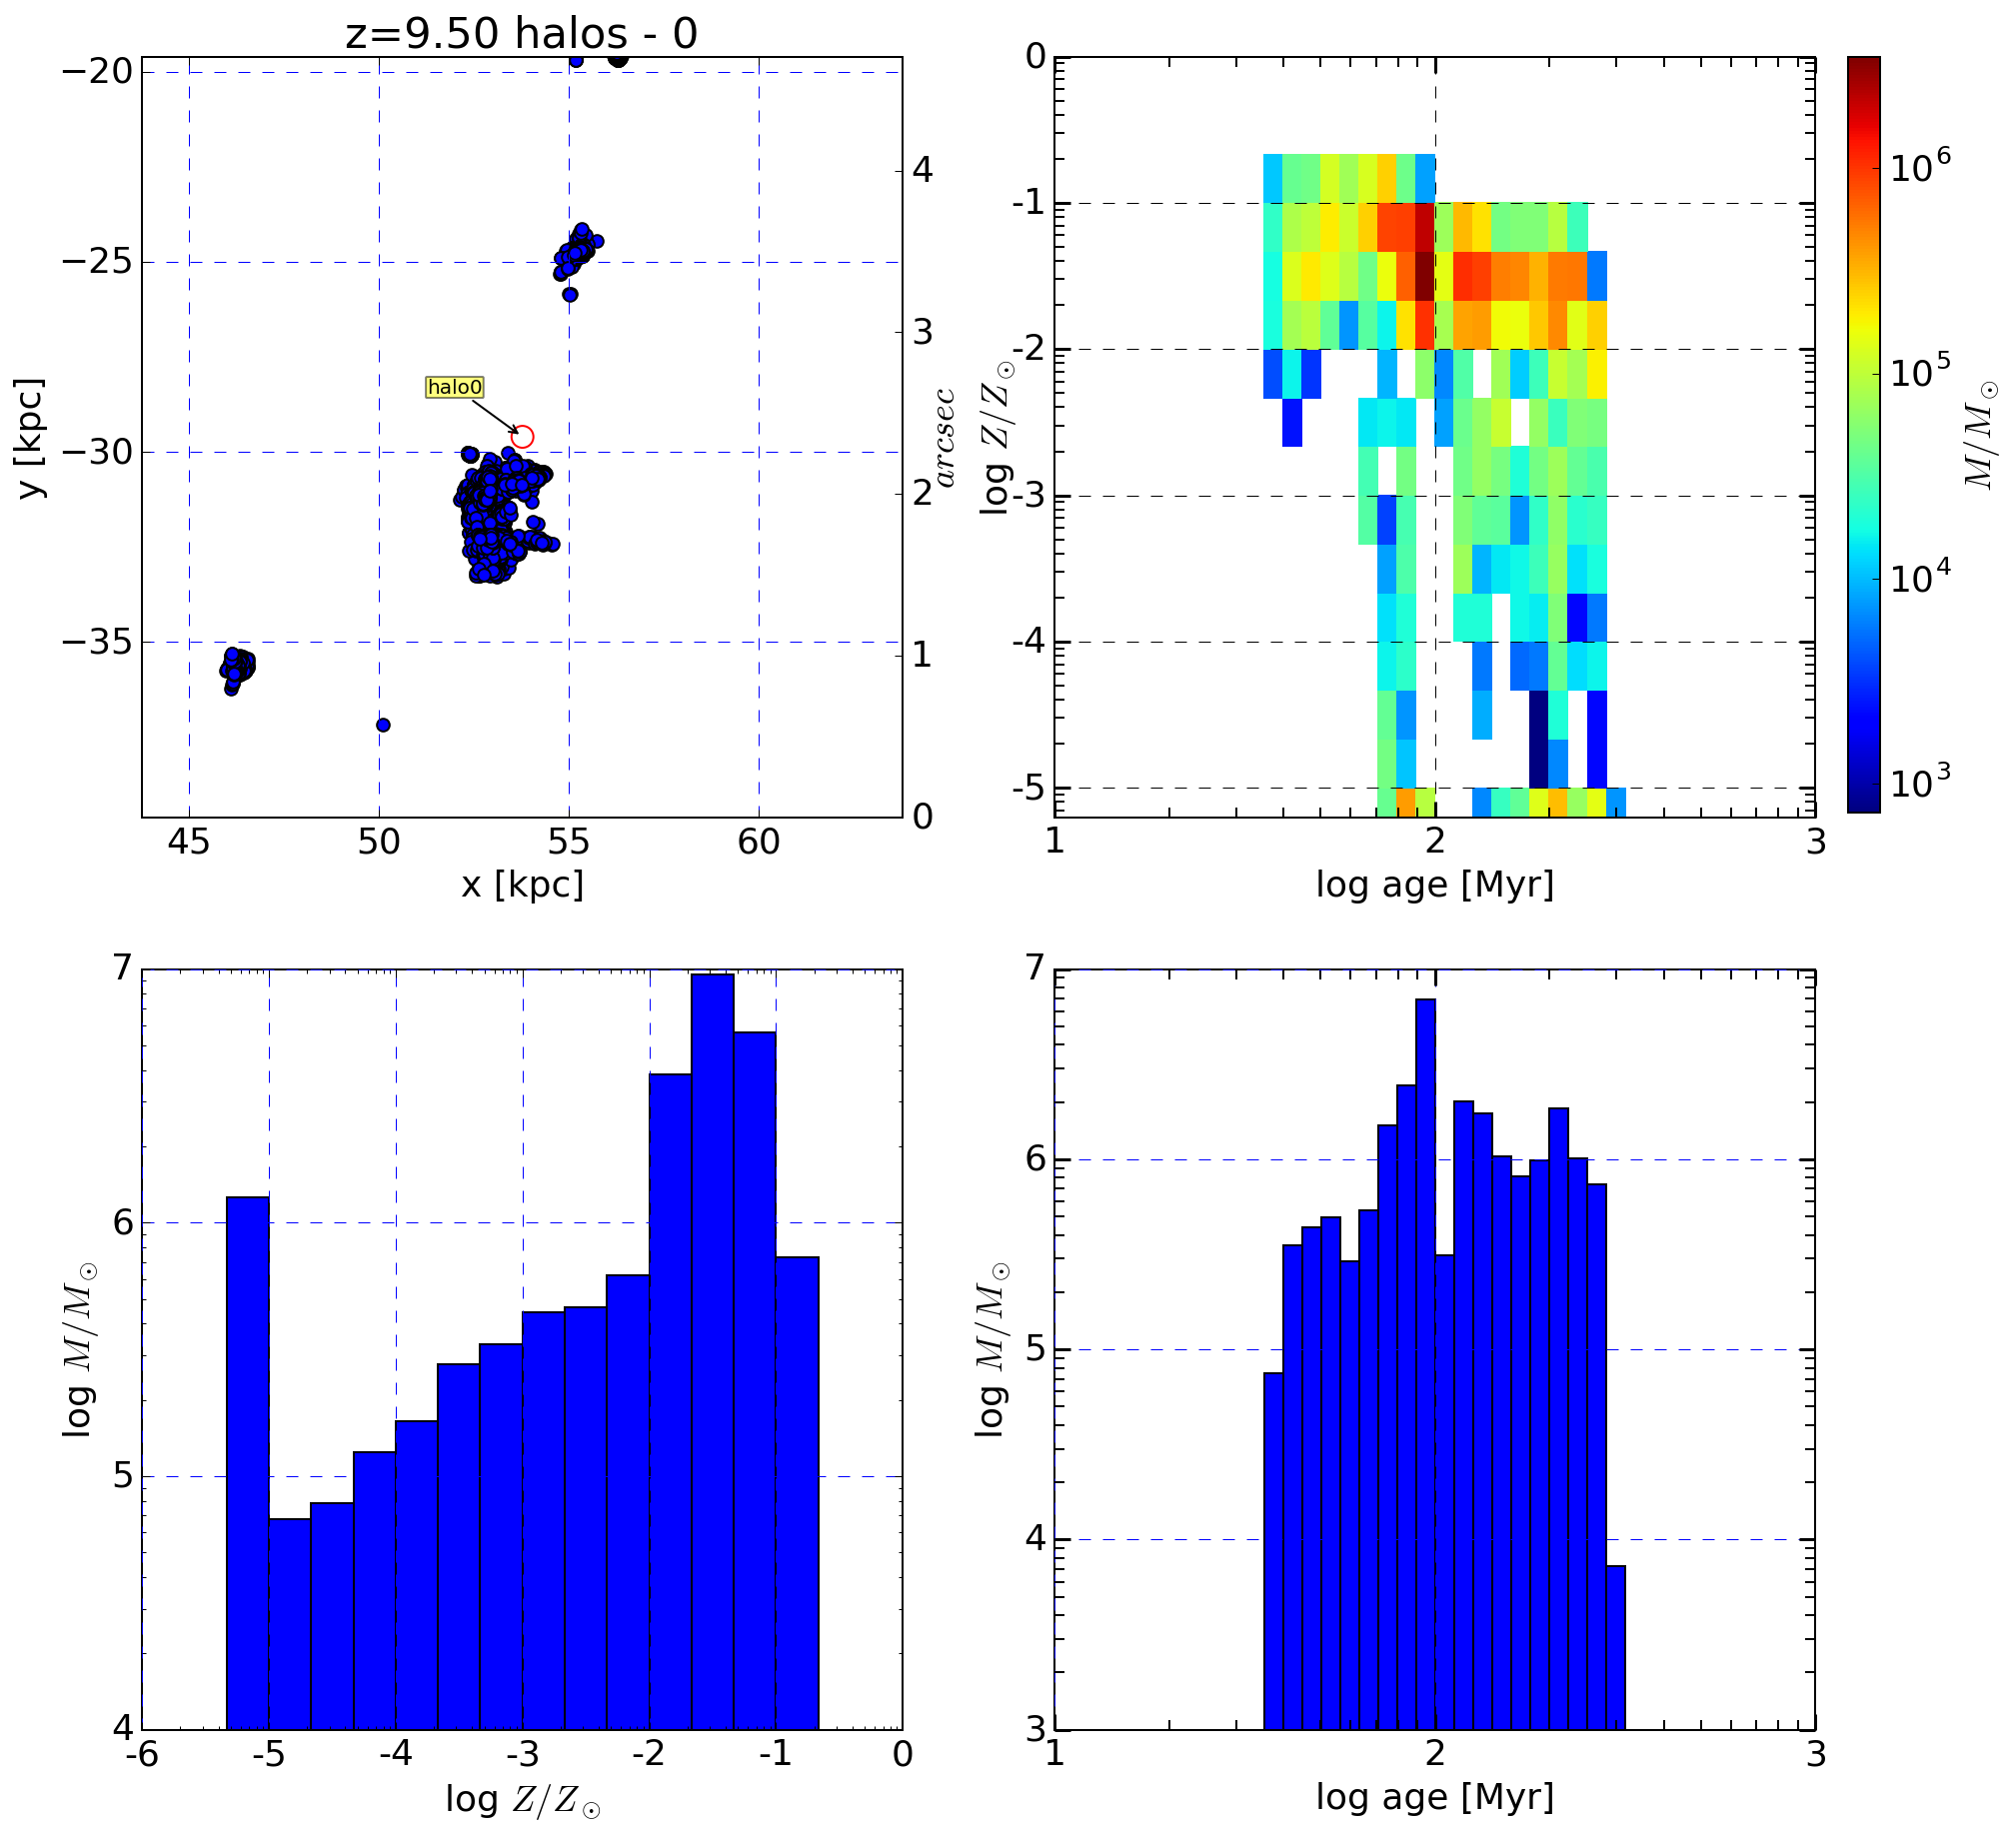

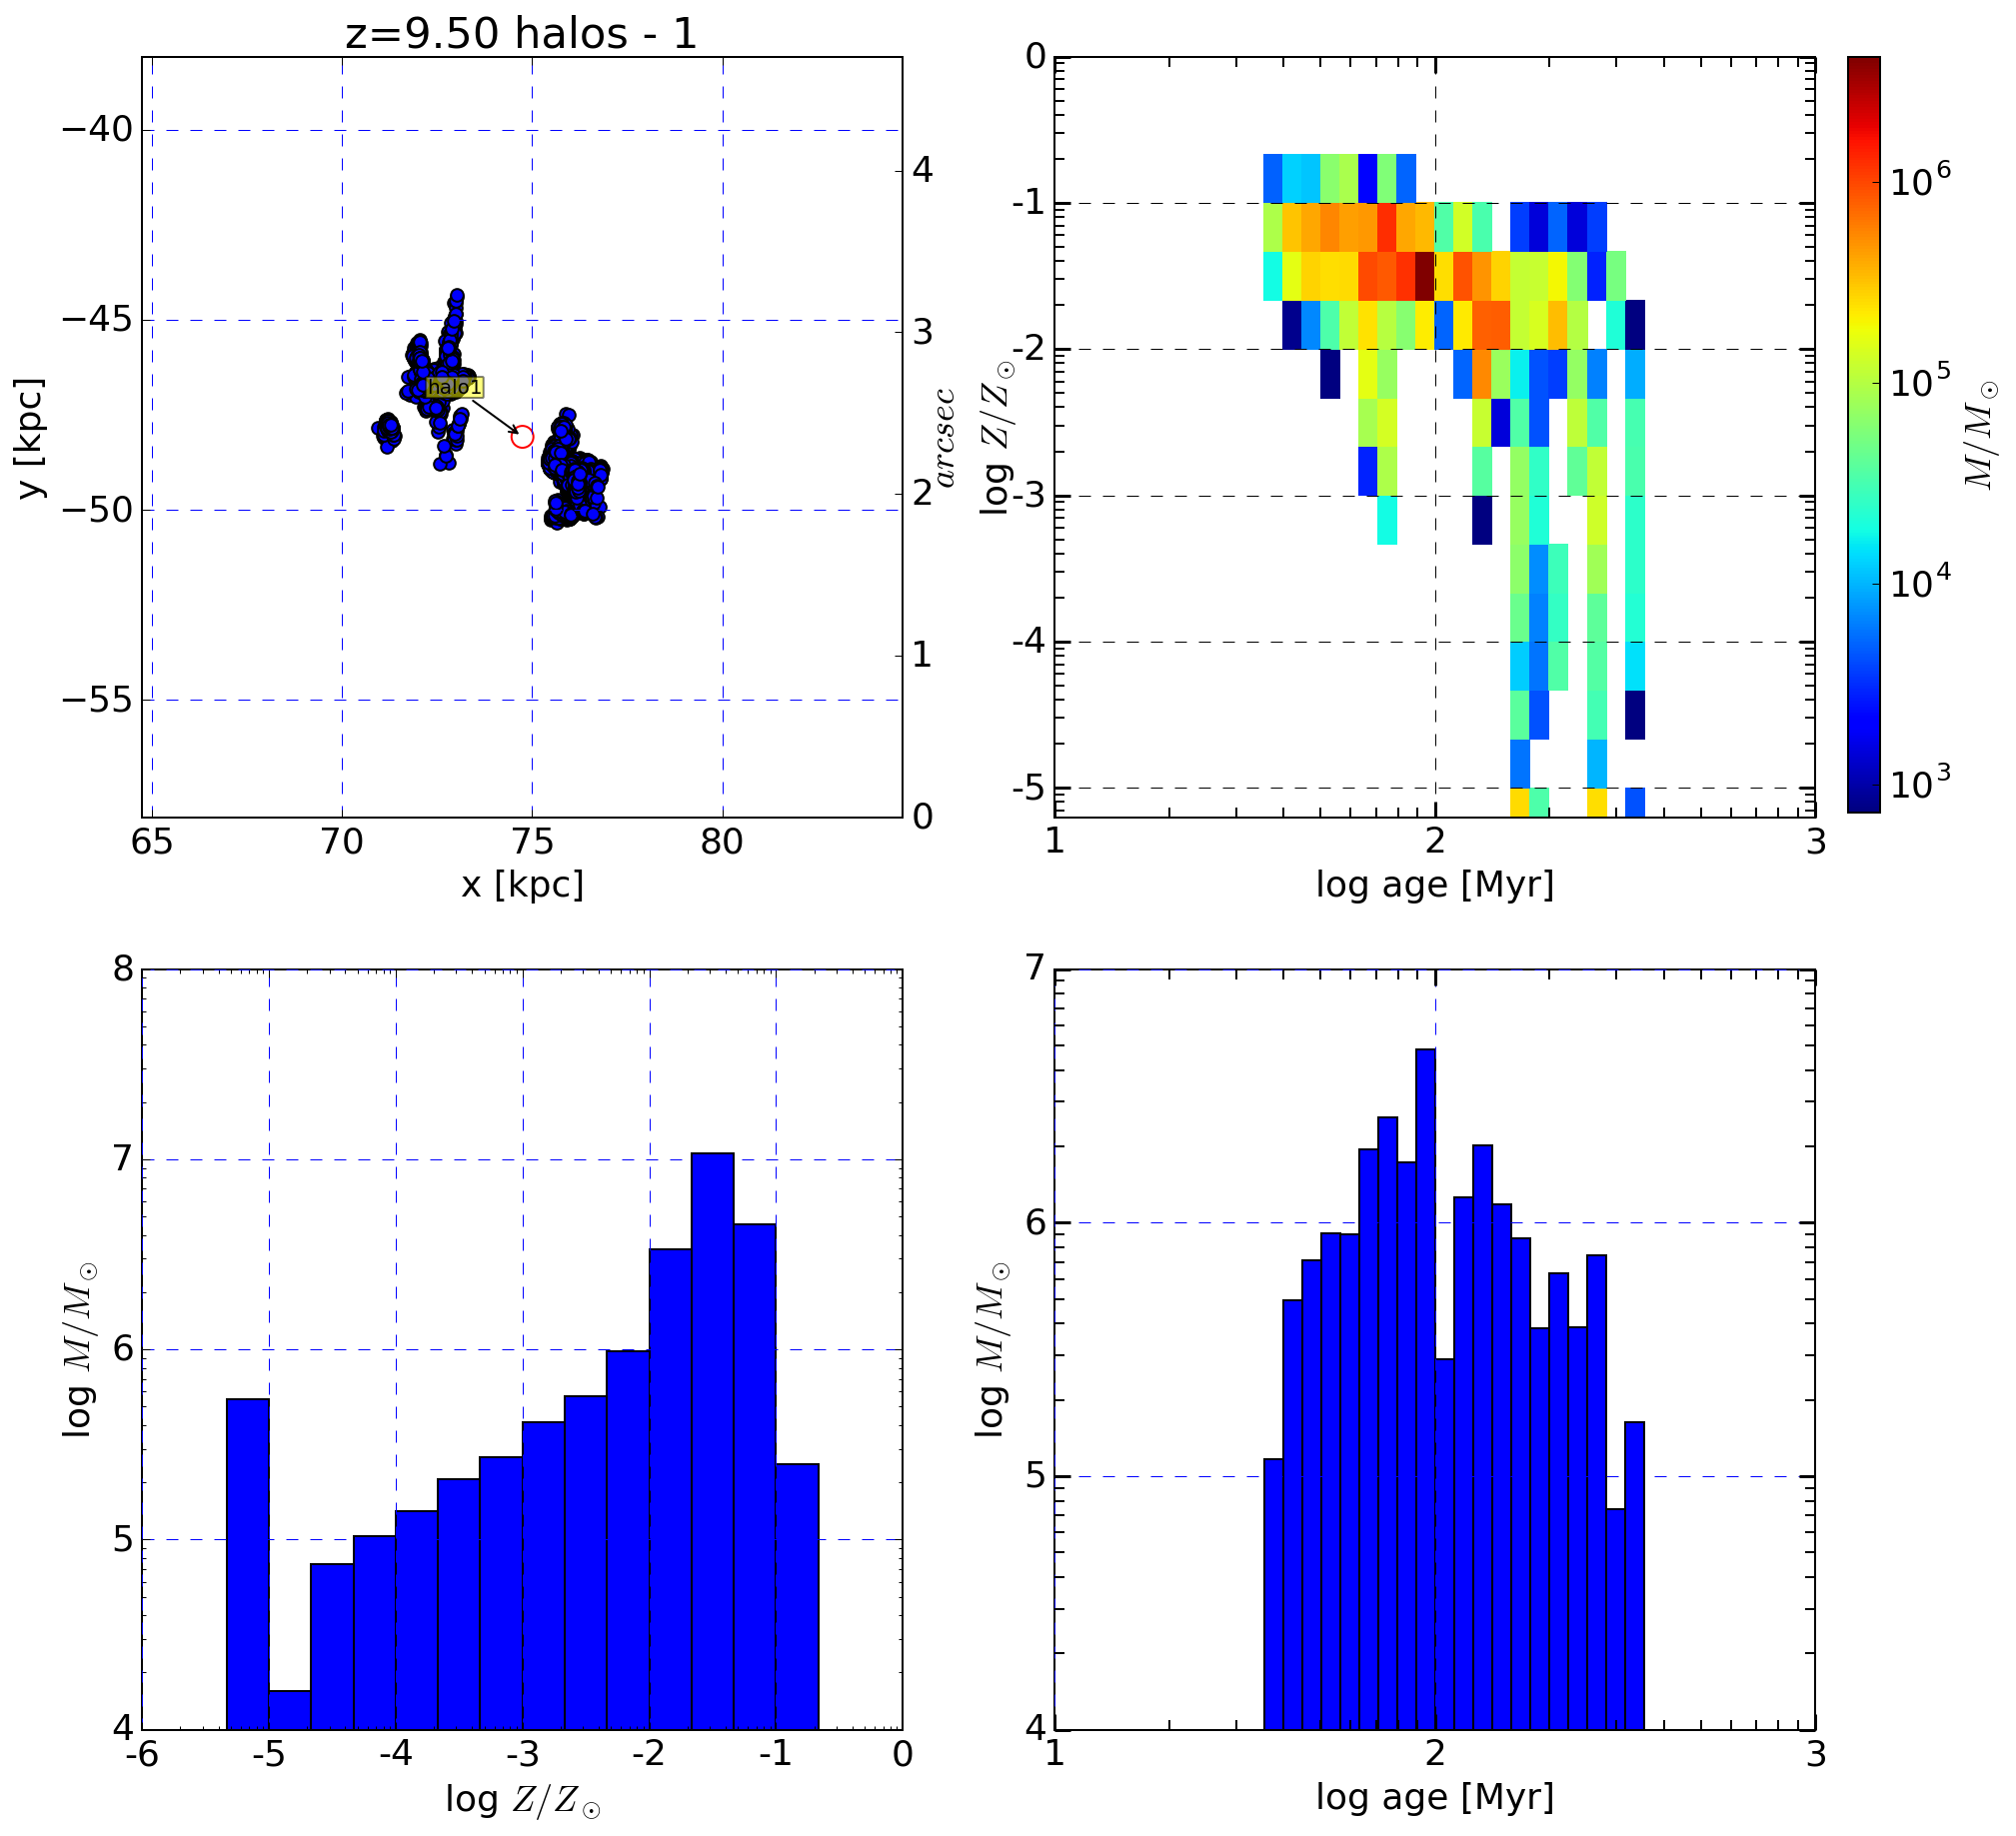

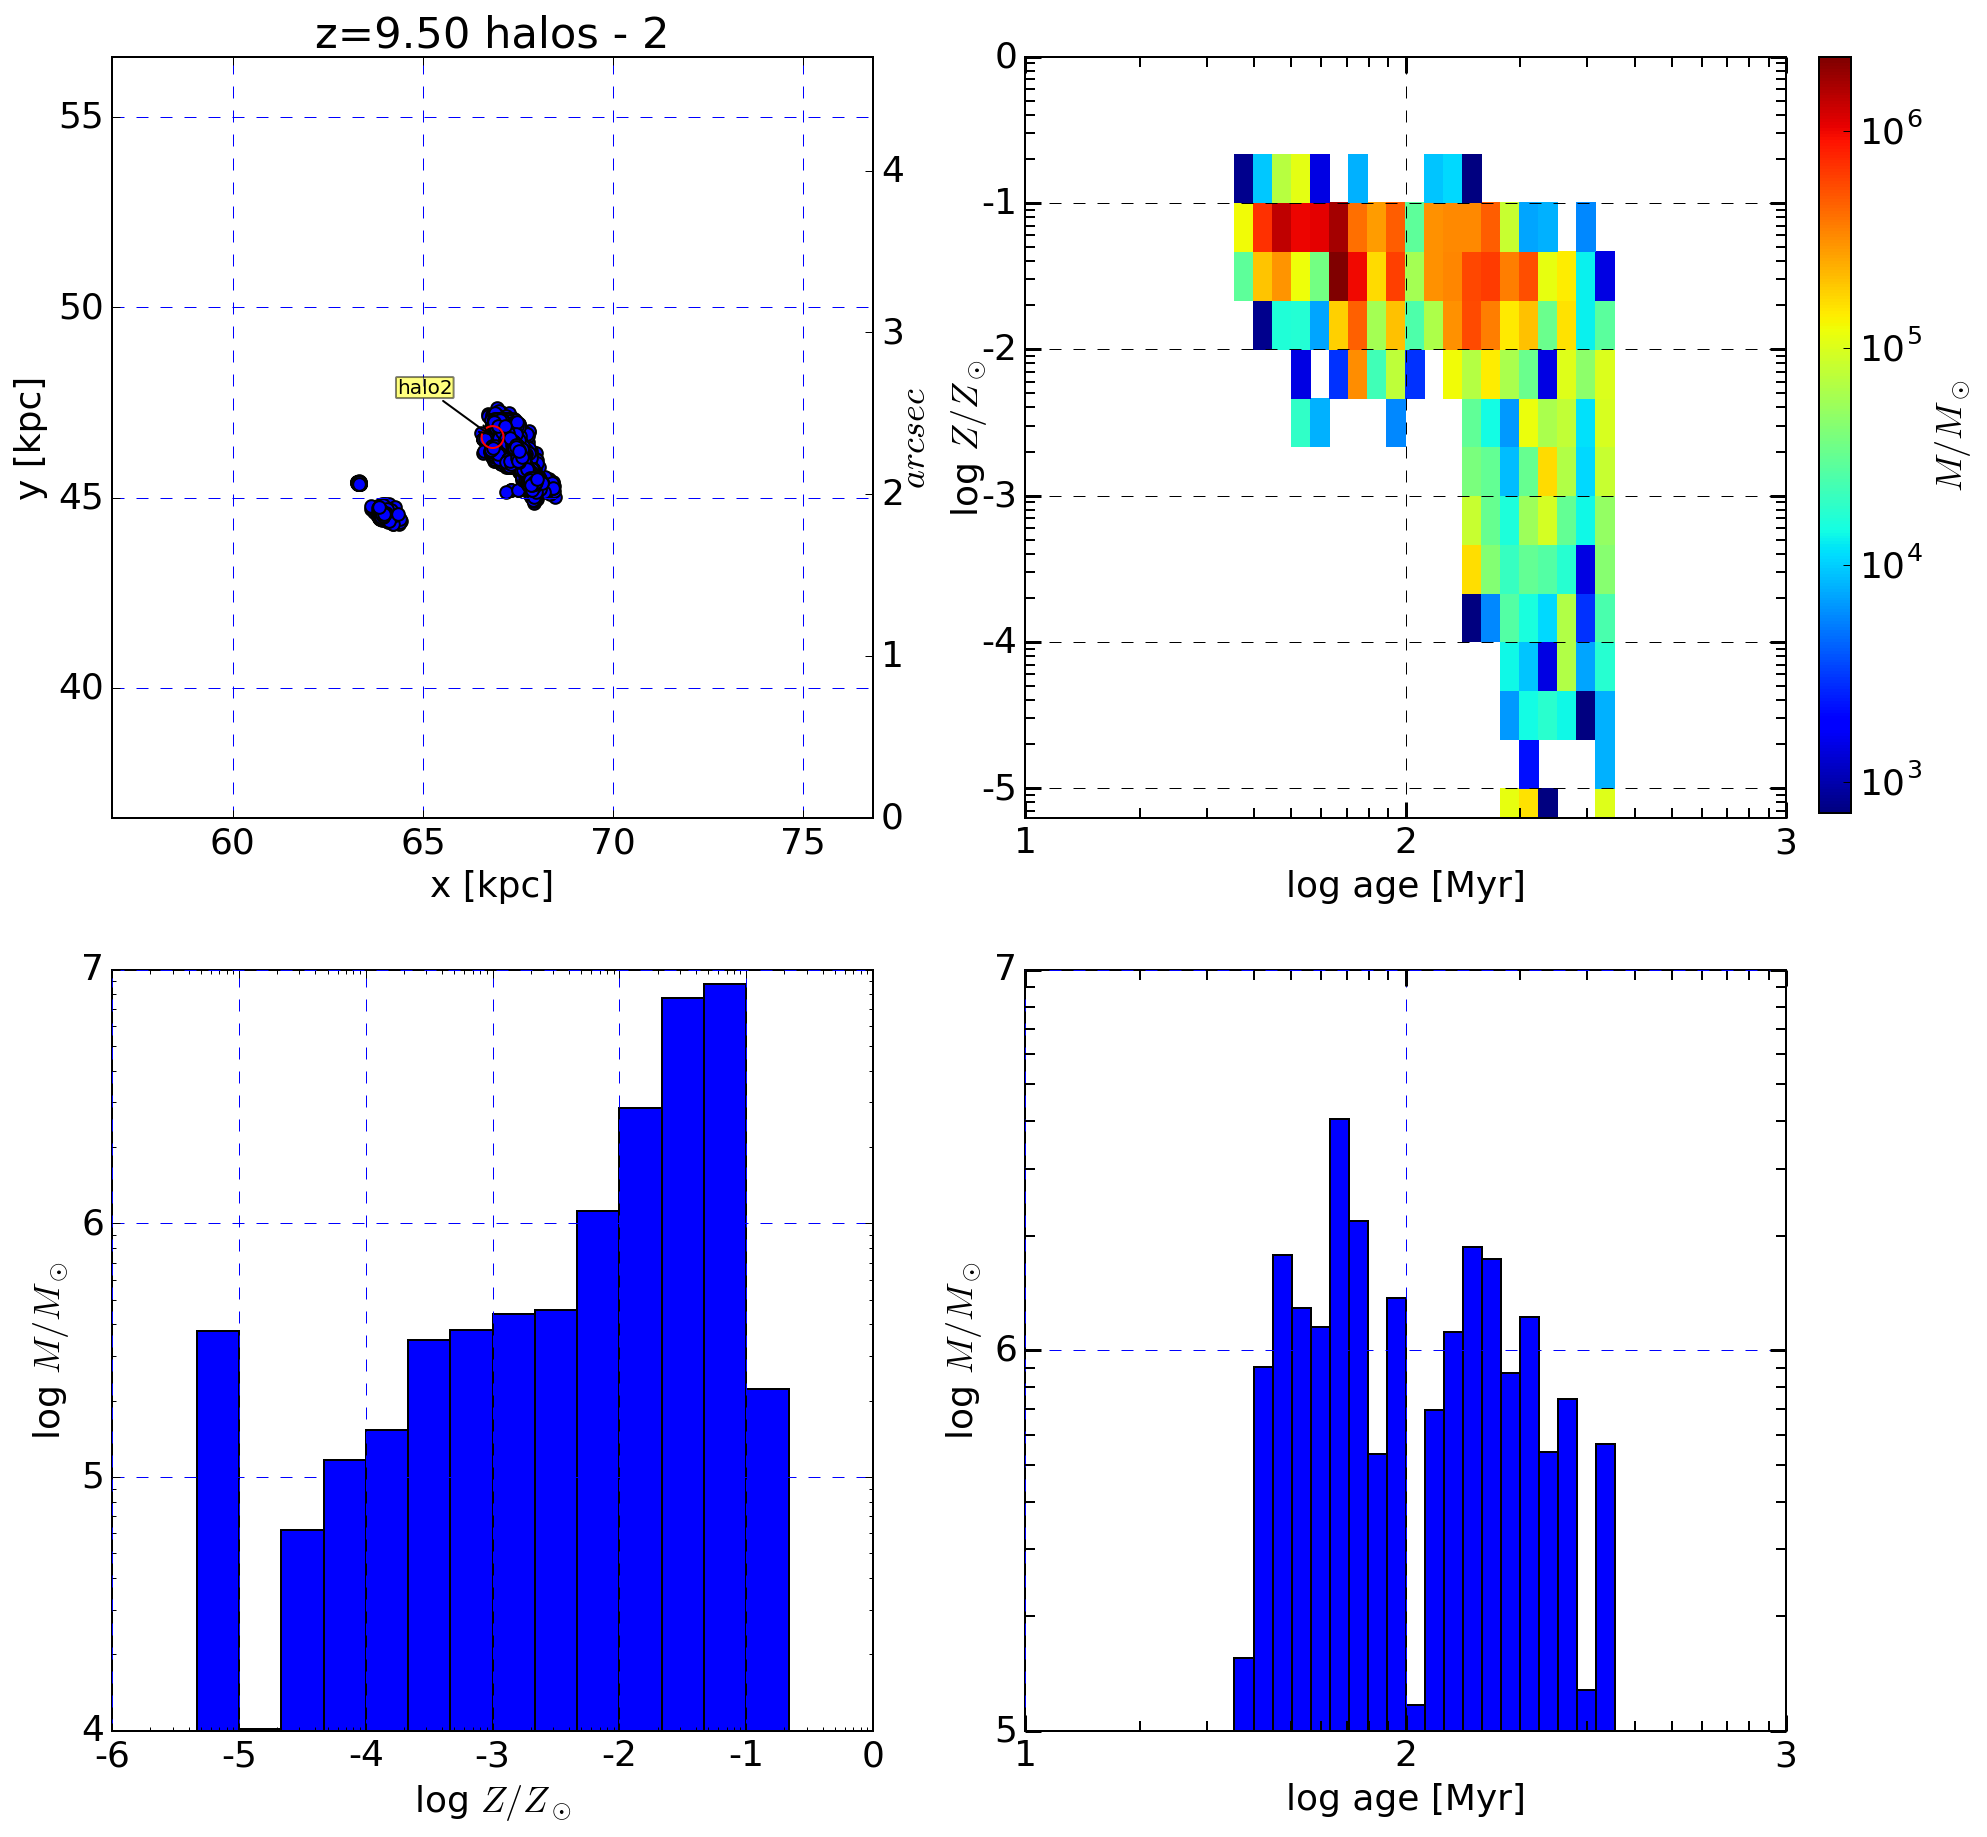

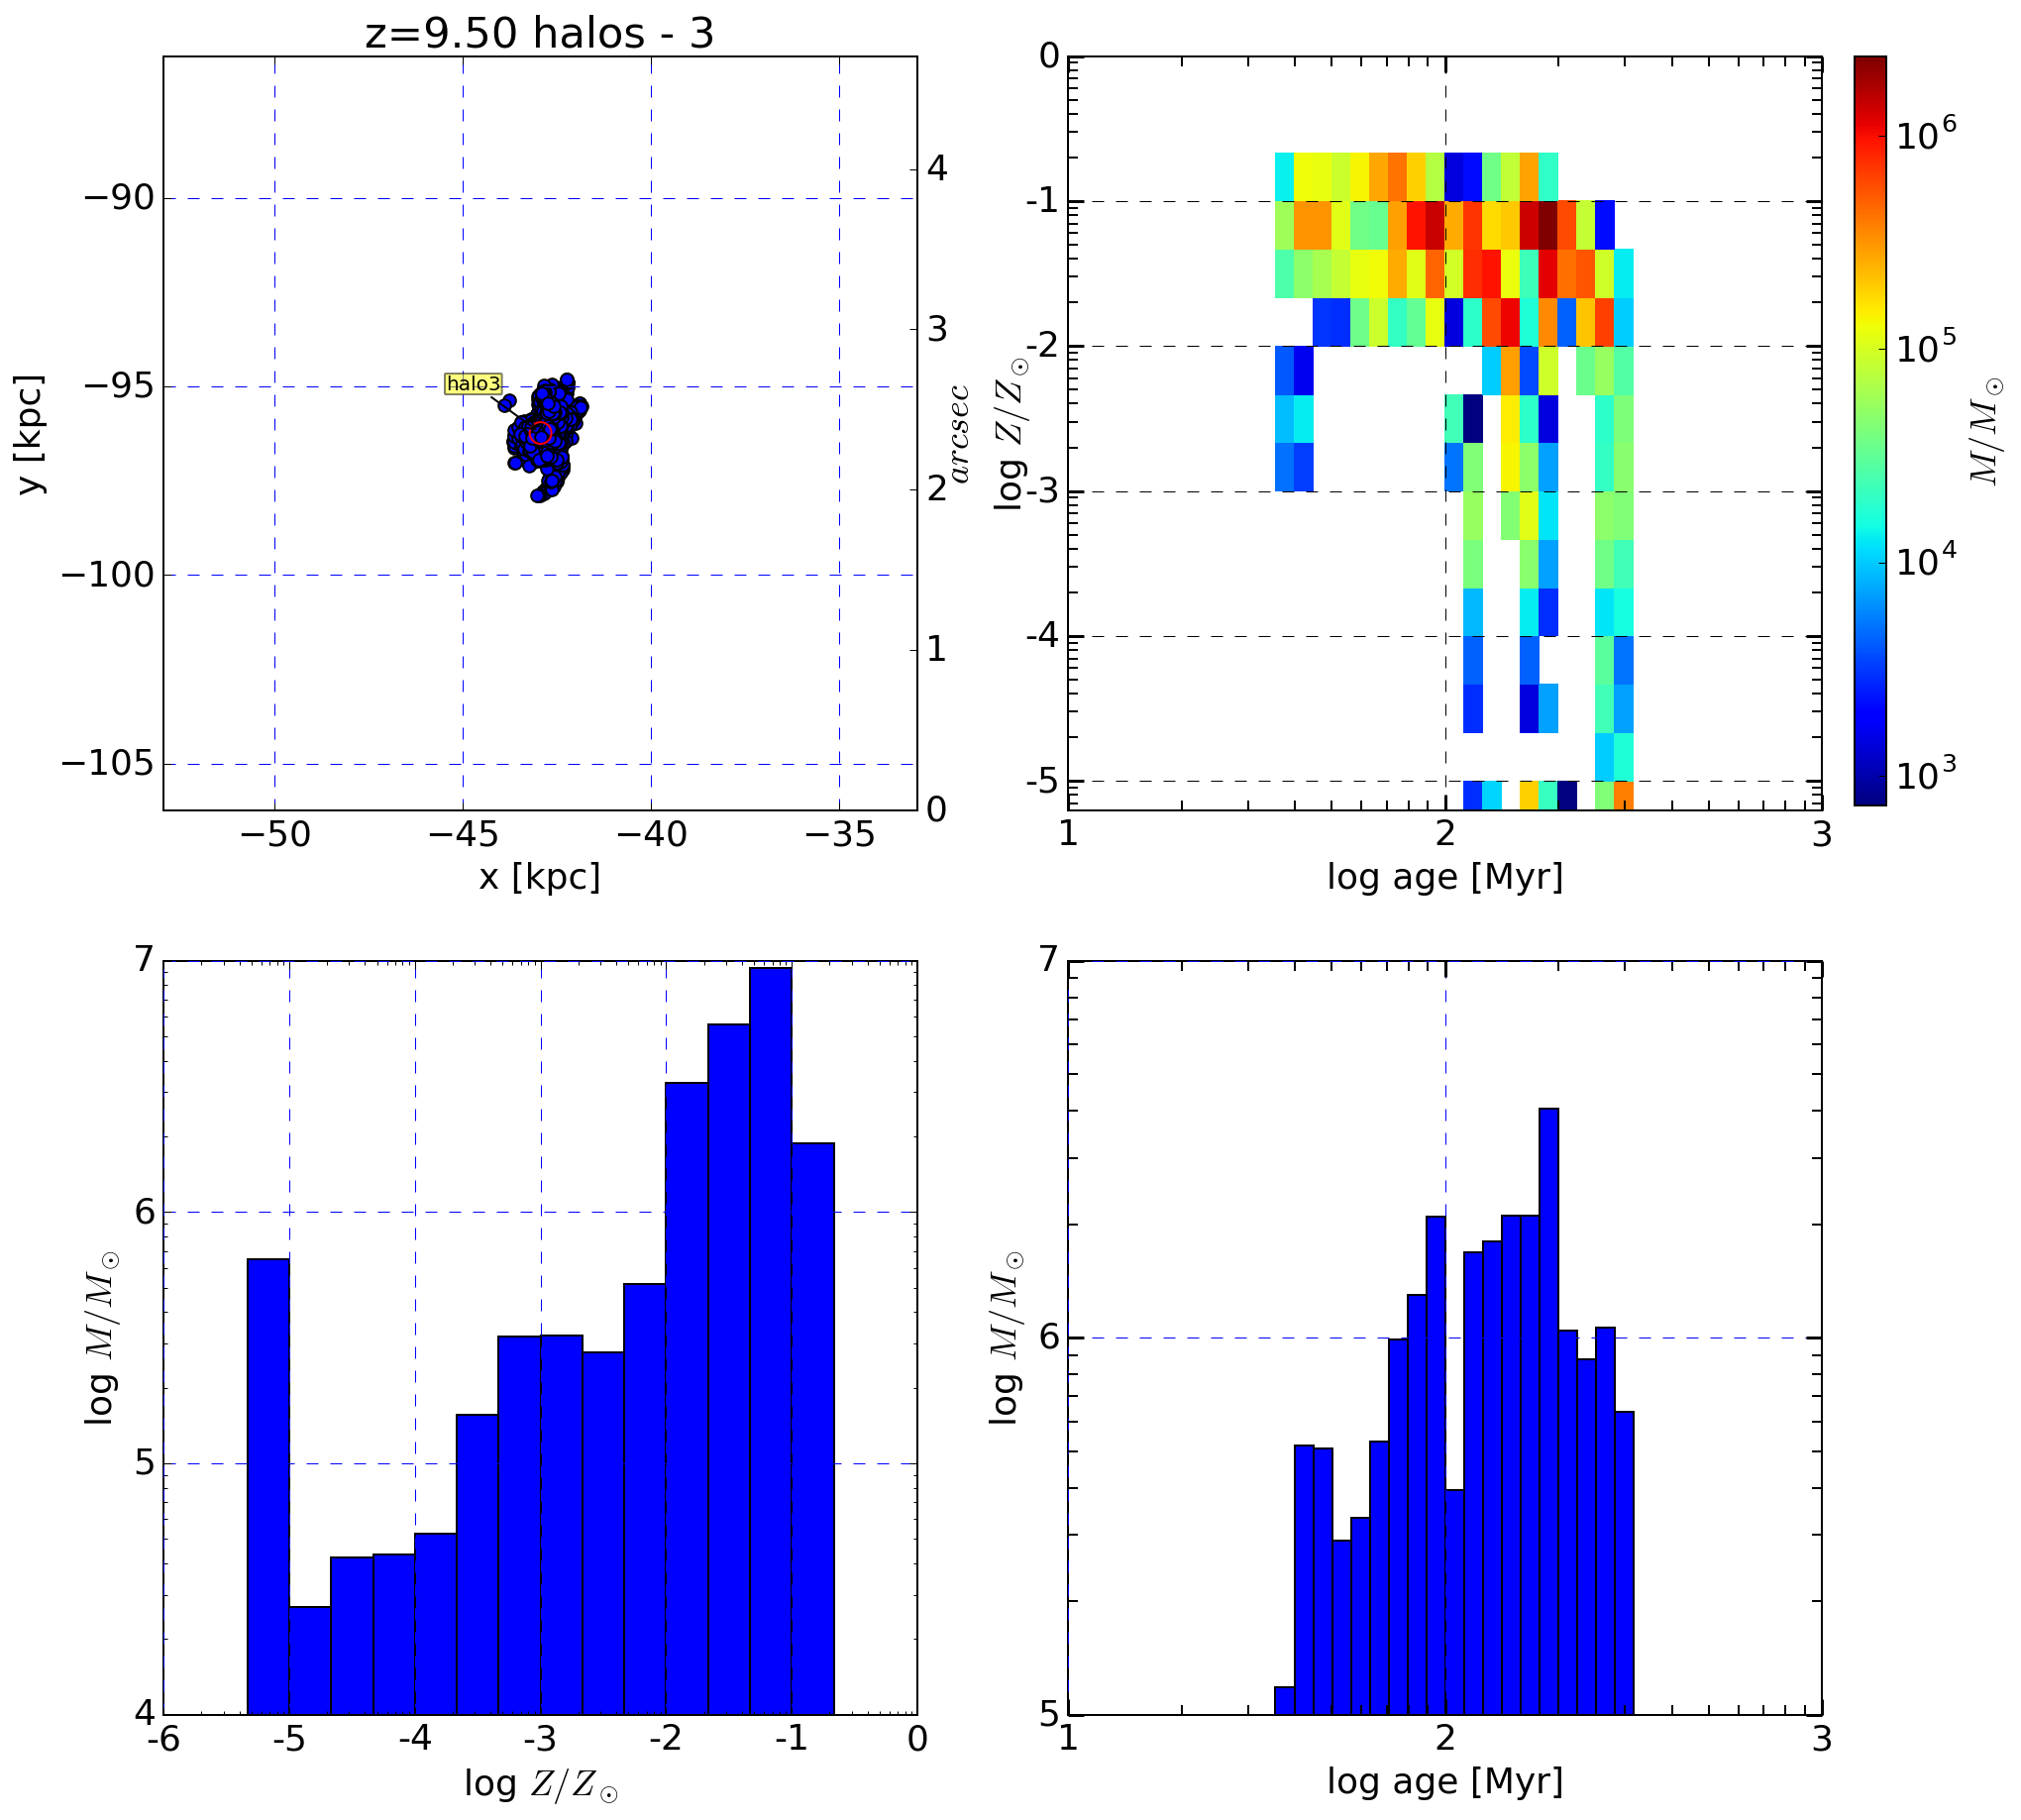

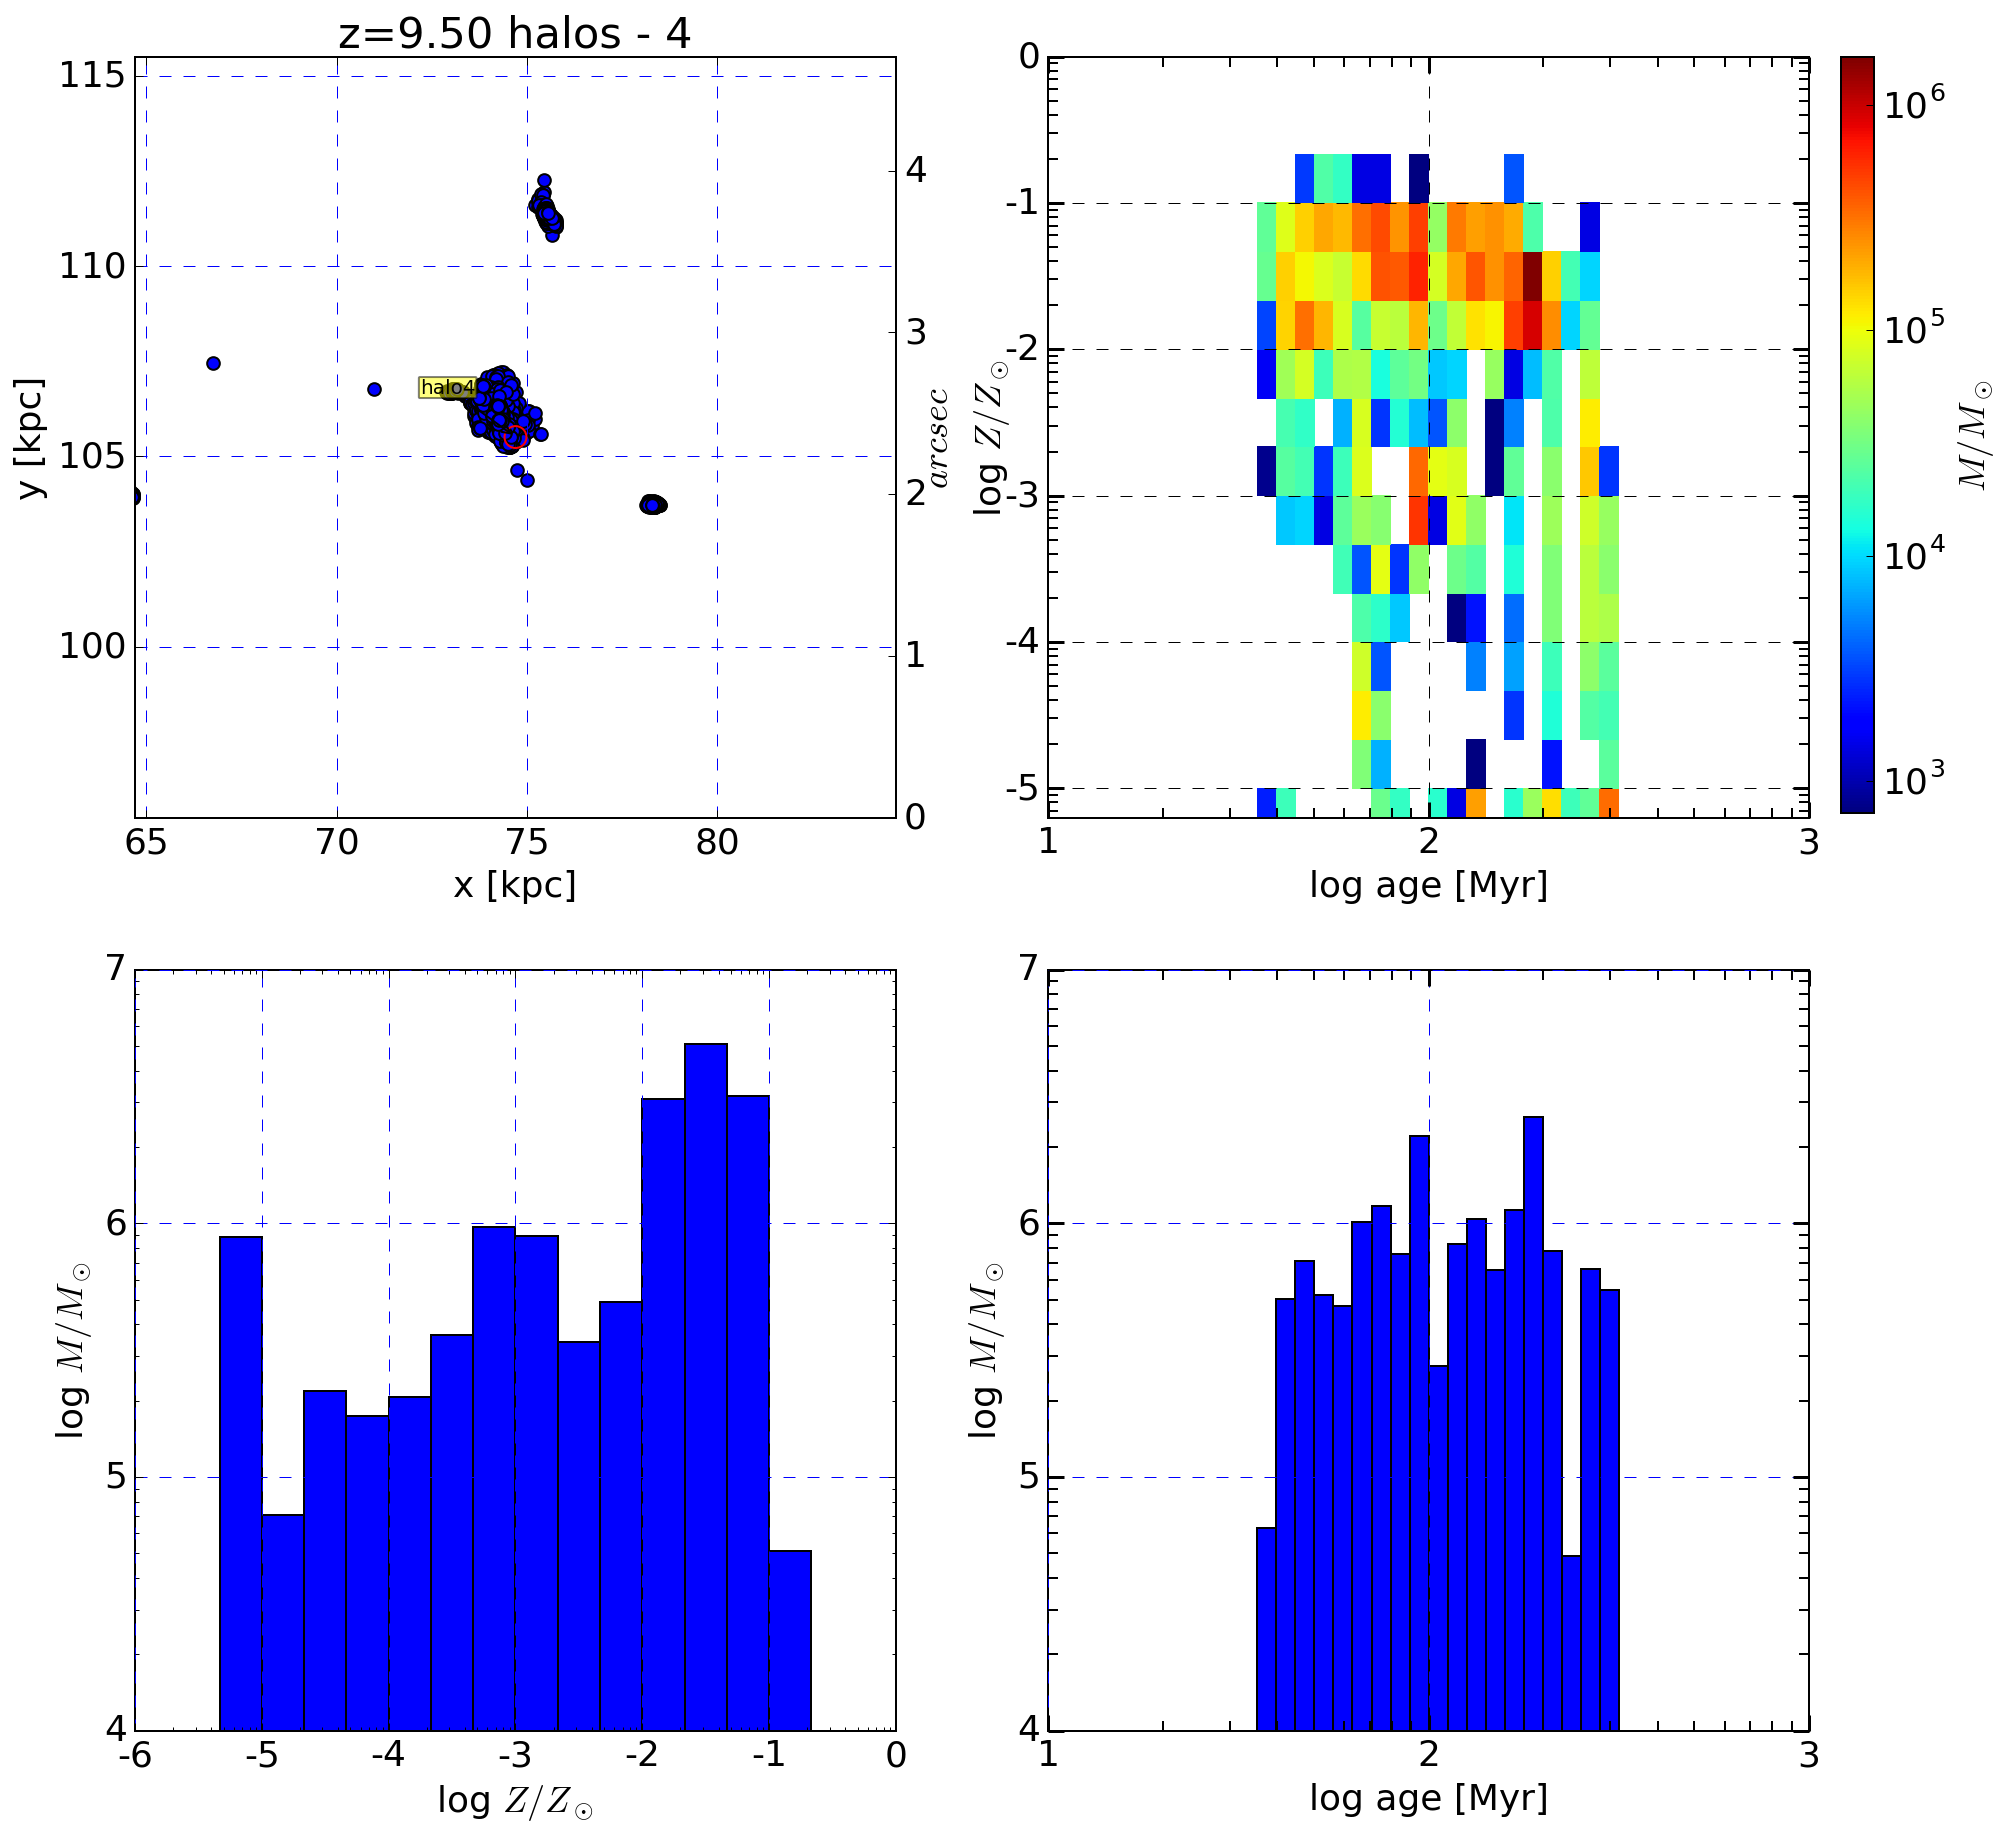

In [165]:
plt.rcParams['font.size'] = 18
cmap = plt.cm.jet
for haloNum in range(0,5):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))
    #
    # Star particles for halo haloNum
    #

    arcSec = cosmo.arcAtz(71,z)

    #
    # Plot the halo star particles - scatter
    #
    size = 20
    hax=halos.pltHalo(locs,halosPos,haloNum,z,size,ax=ax1)
    origXlim=hax.get_xlim()
    origYlim=hax.get_ylim()

    # Add axis with arcsec scale
    hax2 = hax.twinx()
    hax2.set_ylim([0,size/arcSec])
    hax2.set_ylabel(r'$arcsec$')
    hax2.yaxis.labelpad = -3
    hax.set_xlim(origXlim)
    hax.set_ylim(origYlim)

    # Load the stars for this halo
    haloStars,halomass,haloages,haloZ,haloPZ,haloPPF = halos.getHaloStars(locs,mass,ages,Z,PZ,PPF,
                                                                          halosPos,haloNum,size)

    #
    # Metallicity of the halo star particles - histogram
    #
    Zfixed = haloZ
    Zfixed[Zfixed < 1e-5] = 10**-5.1

    ZBins   = np.logspace(-6,0,19)
    ax3.hist(Zfixed,bins=ZBins,weights=halomass)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.xaxis.set_major_formatter(logformatter)
    ax3.yaxis.set_major_formatter(logformatter)
    ax3.grid(b=True, which='major', color='b', linestyle='--')
    ax3.set_xlabel(r'log $Z/Z_\odot$')
    ax3.set_ylabel(r'log $M/M_\odot$')

    #
    # Age of halo star particles - histogram
    #
    ageBins = np.logspace(0,3,61) # TO match the SEDs we have from Schaerer, use 0.05 dex steps

    n, bins, patches = ax4.hist(haloages,bins=ageBins, weights=halomass)
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.xaxis.set_major_formatter(logformatter)
    ax4.yaxis.set_major_formatter(logformatter)
    ax4.grid(b=True, which='major', color='b', linestyle='--')
    ax4.tick_params('both', length=5, width=1, which='minor')
    ax4.tick_params('both', length=8, width=1.5, which='major')
    ax4.set_xlabel('log age [Myr]')
    ax4.set_ylabel(r'log $M/M_\odot$')
    ax4.set_xlim([10,1000])
    
    #
    # 2D histogram, Z vs age
    #
    ageBins = np.logspace(0,3,61) # match the SEDs we have from Schaerer, use 0.05 dex steps
    ZBins   = np.logspace(-6,0,19)

    Zfixed = haloZ
    Zfixed[Zfixed < 1e-5] = 10**-5.1

    # Can't use matplotlib with log axis... is screws it up.
    # n, aBins, metBins, image = ax.hist2d(ages,Zfixed,bins=(ageBins,ZBins),norm=LogNorm(),
    #                                    weights=mass)
    # Need to use numpy...
    n, aBins, metBins = np.histogram2d(Zfixed,haloages,bins=(ZBins,ageBins),
                                            weights=halomass)
    histax = ax2.pcolormesh(ageBins, ZBins, n, norm=LogNorm())

    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.xaxis.set_major_formatter(logformatter)
    ax2.yaxis.set_major_formatter(logformatter)
    ax2.grid(b=True, which='major', color='k', linestyle='--')
    ax2.tick_params('both', length=5, width=1, which='minor')
    ax2.tick_params('both', length=8, width=1.5, which='major')
    ax2.set_xlabel(r'log age [Myr]')
    ax2.set_ylabel(r'log $Z/Z_\odot$')
    ax2.set_xlim([10,1000])
    ax2.set_ylim([10**-5.2,1])
    cax = fig.add_axes([0.915, 0.55, 0.015, 0.35])
    fig.colorbar(histax, cax=cax, label="$M/M_\odot$")
    ax2.yaxis.labelpad = -4

    #plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.1, hspace=.1)


In [2]:
np.logspace(-6,0,19)

array([  1.00000000e-06,   2.15443469e-06,   4.64158883e-06,
         1.00000000e-05,   2.15443469e-05,   4.64158883e-05,
         1.00000000e-04,   2.15443469e-04,   4.64158883e-04,
         1.00000000e-03,   2.15443469e-03,   4.64158883e-03,
         1.00000000e-02,   2.15443469e-02,   4.64158883e-02,
         1.00000000e-01,   2.15443469e-01,   4.64158883e-01,
         1.00000000e+00])

In [170]:
# Check mass in last halo vs what the histogram says is the total
n.sum(), halomass.sum()

(16032182.922135046, 16032182.922135111)

In [191]:
# Looks correct ... for halo4 the total in the range below should be in the orange
np.log10(halomass[(Zfixed==10**-5.1) & (haloages >= 10**2.45) & (haloages <= 10**2.50)].sum())

5.5253340771582877

In [7]:
# Numpy histograms include left edge, but not right unless it is the final bin...
conditions = np.empty([19,61])
for indxz, az in enumerate(np.logspace(-6,0,19)):
    for indxa, aa in enumerate(np.logspace(0,3,61)):
        conditions[indxz,indxa] = 

1e-06
2.15443469003e-06
4.64158883361e-06
1e-05
2.15443469003e-05
4.64158883361e-05
0.0001
0.000215443469003
0.000464158883361
0.001
0.00215443469003
0.00464158883361
0.01
0.0215443469003
0.0464158883361
0.1
0.215443469003
0.464158883361
1.0


In [14]:
for ind, a in enumerate(np.linspace(0,5,6)):
    print(ind,a)

0 0.0
1 1.0
2 2.0
3 3.0
4 4.0
5 5.0


In [11]:
conditions[0]

array([  0.00000000e+000,   0.00000000e+000,   2.17645492e-314,
         2.17645491e-314,   2.17645491e-314,   2.17645490e-314,
         2.17645490e-314,   2.17645489e-314,   2.17645488e-314,
         2.17645488e-314,   2.17645487e-314,   2.17645486e-314,
         2.17645486e-314,   2.17645485e-314,   2.17645484e-314,
         2.17645484e-314,   2.17645483e-314,   2.17645483e-314,
         2.17645482e-314,   2.17645481e-314,   2.17645481e-314,
         2.17645480e-314,   2.17645479e-314,   2.17645479e-314,
         2.17645478e-314,   2.17645477e-314,   2.17645477e-314,
         2.17645476e-314,   2.17645475e-314,   2.17645475e-314,
         2.17645474e-314,   2.17645473e-314,   2.17645473e-314,
         2.17645472e-314,   2.17645471e-314,   2.17645470e-314,
         2.17645470e-314,   2.17645469e-314,   2.17645468e-314,
         2.17645468e-314,   2.17645467e-314,   2.17645466e-314,
         2.17645466e-314,   2.17645465e-314,   2.17645464e-314,
         2.17645463e-314,   2.17645463e-

In [ ]:
plt.rcParams['font.size'] = 32

# To plot star particle locs, we need to center on a halo

In [30]:
# Get only the stars in the halo -- within 40 kpc of the center
haloStars,halomass,haloages, haloZ,haloPZ,haloPPF = halos.getHaloStars(locs,mass,ages,Z,PZ,PPF,halosPos,0,40)

In [31]:
len(haloStars),locs

(35637, array([[ -99.53752334,  -58.6532154 , -104.47938321],
        [ -74.77011246,  -54.62774748, -106.40648134],
        [ -74.76224051,  -54.61064111, -106.39499281],
        ..., 
        [  51.27059985,  -70.77334023, -194.10726276],
        [  51.26832913,  -70.89807074, -194.11447627],
        [  51.27049721,  -70.8407234 , -194.11437167]]))

In [22]:
halofpol = (1-haloPPF)
halofpol[halofpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
haloZf=haloZ/halofpol # This is our Z corrected for f_pol
haloZf[np.isinf(haloZf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
haloZf[np.isnan(haloZf)] = 10**-7.5
haloZf[haloZf<1e-7] = 10**-7.5

haloZ[haloZ<1e-7] = 10**-7.5

haloPZf=haloPZ/halofpol
haloPZf[np.isinf(haloPZf)] = 10**-7.5
haloPZf[np.isnan(haloPZf)] = 10**-7.5
haloPZf[haloPZf<1e-7] = 10**-7.5

haloPZ[haloPZ<1e-7] = 10**-7.5

haloPPF[haloPPF<1e-7] = 10**-7.5

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


In [23]:
# Pick out stars by metallicity range... 
rng1 = (haloZ < 1.e-5)
rng2 = ((haloZ >= 1.e-5) & (haloZ < 1.e-3))
rng3 = ((haloZ >= 1.e-3) & (haloZ < 1.e-1))
rng4 = (haloZ >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (haloZf < 1.e-5)
rngf2 = ((haloZf >= 1.e-5) & (haloZf < 1.e-3))
rngf3 = ((haloZf >= 1.e-3) & (haloZf < 1.e-1))
rngf4 = (haloZf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (haloPPF < 1.e-5)
pfrng2 = ((haloPPF >= 1.e-5) & (haloPPF < 1.e-3))
pfrng3 = ((haloPPF >= 1.e-3) & (haloPPF < 1.e-1))
pfrng4 = (haloPPF >= 1.e-1)

pzrng1 = (haloPZ < 1.e-5)
pzrng2 = ((haloPZ >= 1.e-5) & (haloPZ < 1.e-3))
pzrng3 = ((haloPZ >= 1.e-3) & (haloPZ < 1.e-1))
pzrng4 = (haloPZ >= 1.e-1)

pzrngf1 = (haloPZf < 1.e-5)
pzrngf2 = ((haloPZf >= 1.e-5) & (haloPZf < 1.e-3))
pzrngf3 = ((haloPZf >= 1.e-3) & (haloPZf < 1.e-1))
pzrngf4 = (haloPZf >= 1.e-1)

In [24]:
z1=np.log10(haloZ[rng1])
z2=np.log10(haloZ[rng2])
z3=np.log10(haloZ[rng3])
z4=np.log10(haloZ[rng4])

zf1=np.log10(haloZf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(haloZf[rngf2])
zf3=np.log10(haloZf[rngf3])
zf4=np.log10(haloZf[rngf4])

pf1=np.log10(haloPPF[pfrng1])
pf2=np.log10(haloPPF[pfrng2])
pf3=np.log10(haloPPF[pfrng3])
pf4=np.log10(haloPPF[pfrng4])

pz1=np.log10(haloPZ[pzrng1])
pz2=np.log10(haloPZ[pzrng2])
pz3=np.log10(haloPZ[pzrng3])
pz4=np.log10(haloPZ[pzrng4])

pzf1=np.log10(haloPZf[pzrngf1])
pzf2=np.log10(haloPZf[pzrngf2])
pzf3=np.log10(haloPZf[pzrngf3])
pzf4=np.log10(haloPZf[pzrngf4])

In [28]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(ii) for ii in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

dotNorm = 10

In [26]:
sbox,haloStars

(14.2, array([[ -5.1416369 ,  -2.32161234,   4.22503227],
        [ -6.95167407,  -2.82840801,   5.35873524],
        [ -6.80296447,  -2.44317117,   5.12823459],
        ..., 
        [ -2.55907146, -32.50926903,   6.50834822],
        [ -2.53041257, -32.38322651,   6.63678223],
        [ -2.42795067, -32.22299523,   6.71380691]]))



(-7.0999999999999996, 7.0999999999999996)
-14.2
14.2


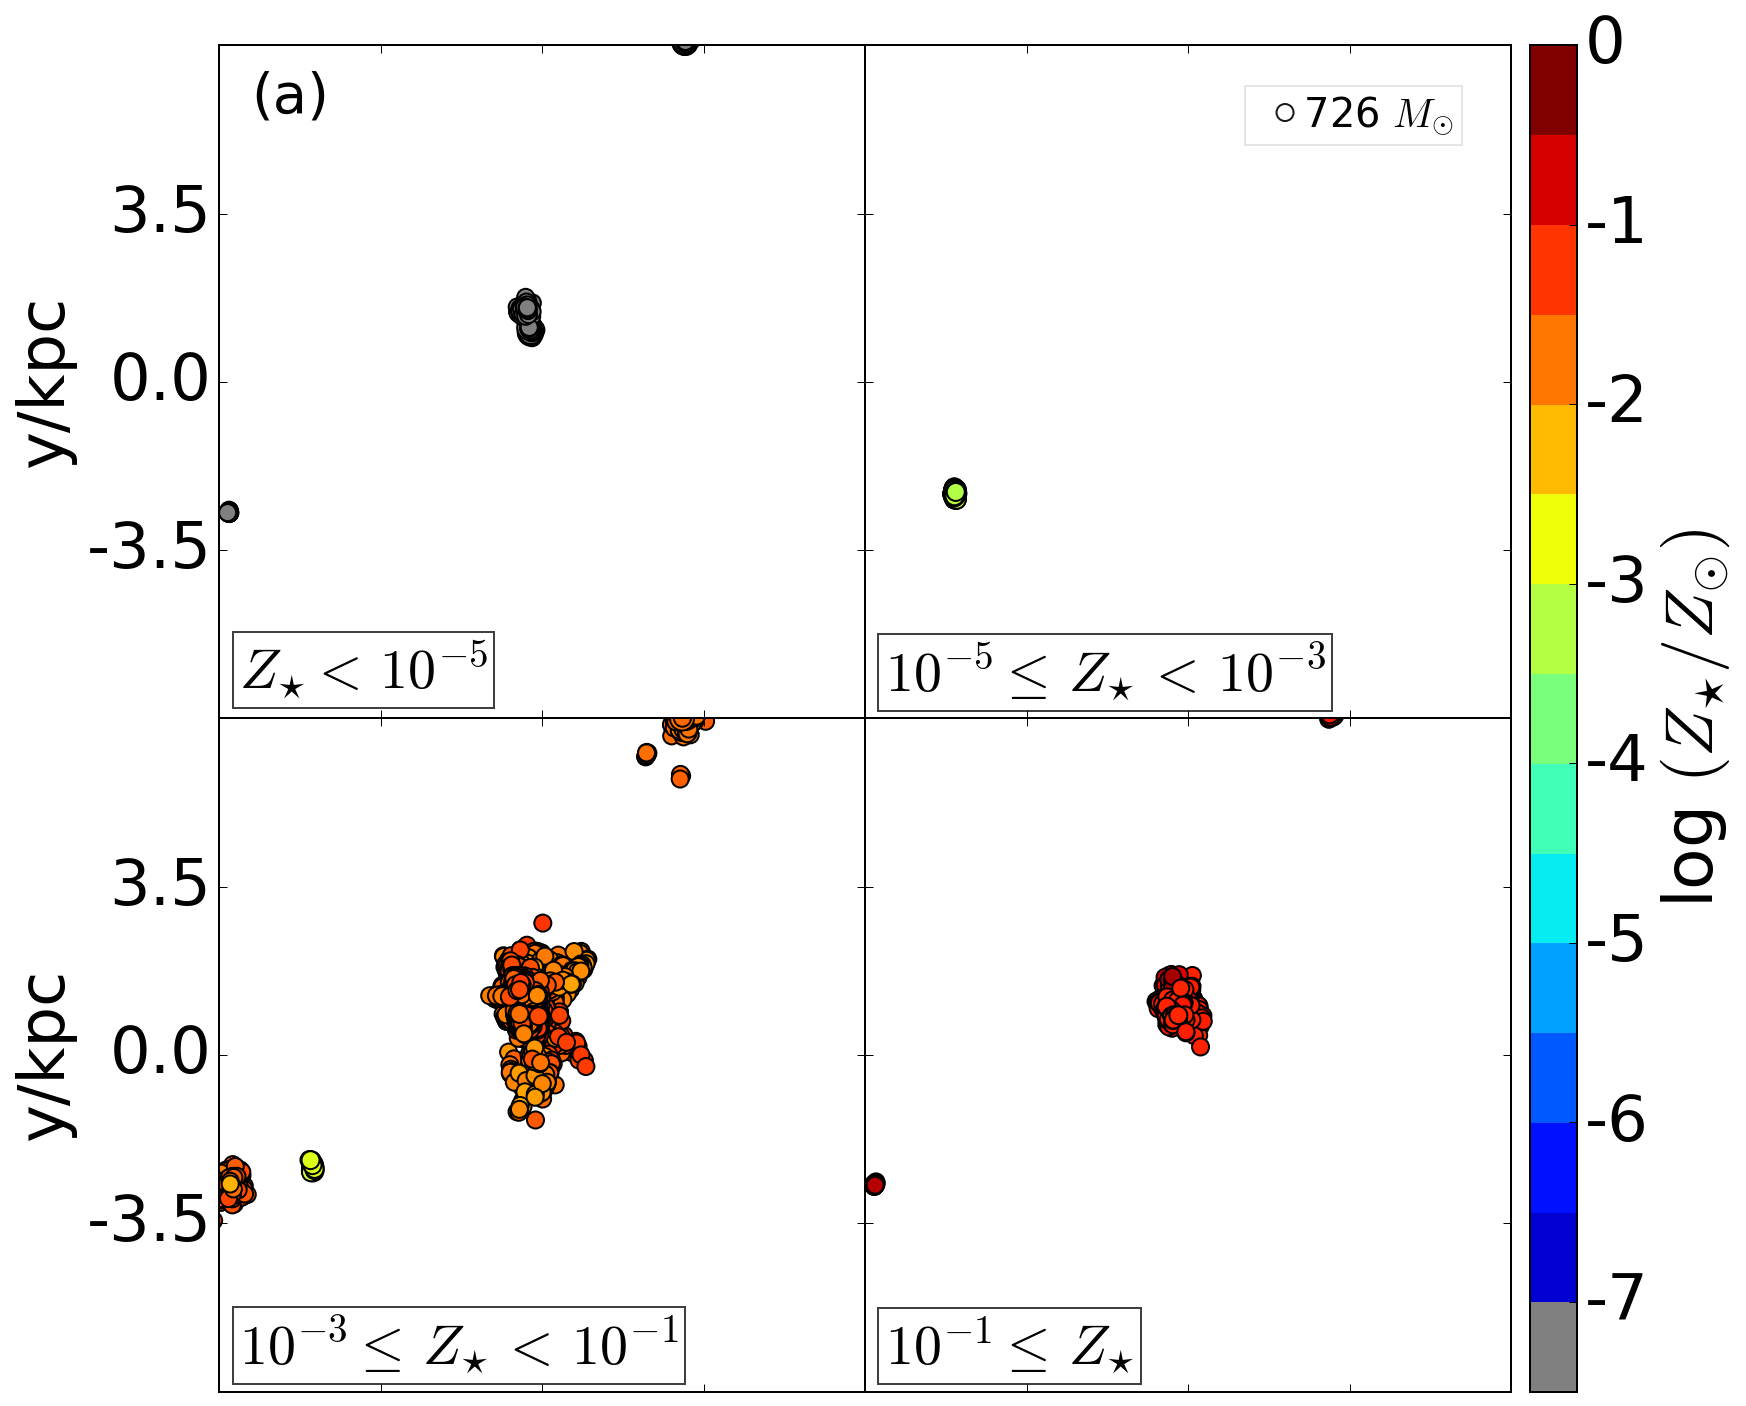

In [43]:
###
### Plot metallicity in 4 subplots
###
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=zf1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=zf2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=zf3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=zf4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')

## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)

bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(0.03,0.025,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize, 
         transform=ax1.transAxes, horizontalalignment='left', verticalalignment='bottom')
ax2.text(0.03,0.04,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',transform=ax2.transAxes,bbox=bbox,fontsize=boxFontSize)
ax3.text(0.03,0.04,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',transform=ax3.transAxes,bbox=bbox,fontsize=boxFontSize)
ax4.text(0.03,0.04,'$10^{-1} \leq\, Z_{\star}\,$',transform=ax4.transAxes,bbox=bbox,fontsize=boxFontSize)

ax1.text(0.05,0.9, '(a)', transform=ax1.transAxes, ha='left', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
print(startx,endx)
print(startx-endx)
print(sbox)

tics = [-sbox/4.0,0,sbox/4.0]
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax1.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax2.text(.6,.88, legStr, transform=ax2.transAxes,
             ha='left', bbox=bbox, size=20)
ax2.scatter([0.65],[0.9],transform=ax2.transAxes, s=np.array([min(mass)])/dotNorm,facecolors='none')


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $(Z_{\star}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_Z_locs_Zcut_z=%04.1lf-%d.pdf"%(z,haloNum), dpi=fig.dpi,bbox_inches='tight')
plt.show()




(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


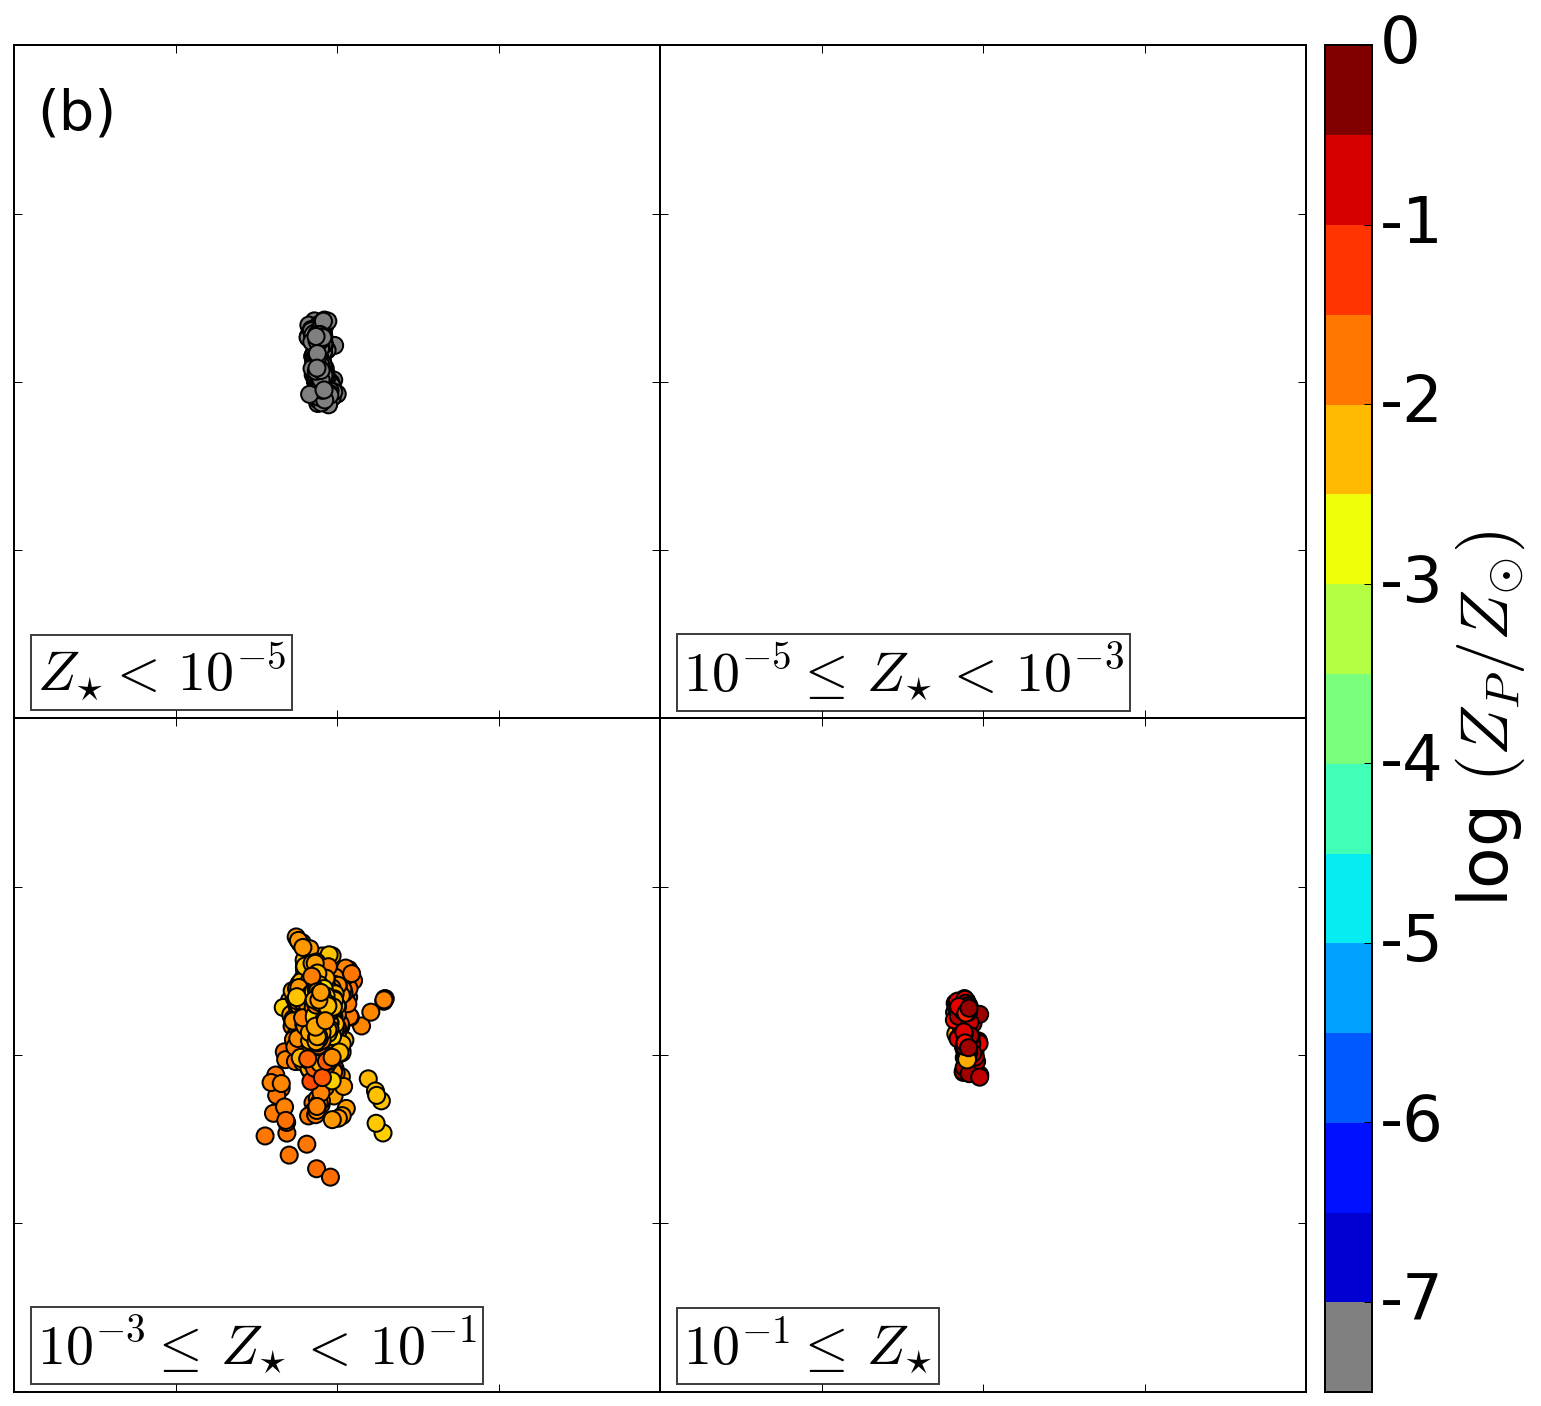

In [256]:
# Color according to Z_P ... but cut on Z/Z_fpol
# Use Z cuts for PPF data... 
z1=np.log10(haloPZf[rngf1])
z2=np.log10(haloPZf[rngf2])
z3=np.log10(haloPZf[rngf3])
z4=np.log10(haloPZf[rngf4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(b)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1

tics = [-sbox/4.0,0,sbox/4.0]
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
print(startx,endx)
print(startx-endx)
print(sbox)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $(Z_{P}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PZ_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


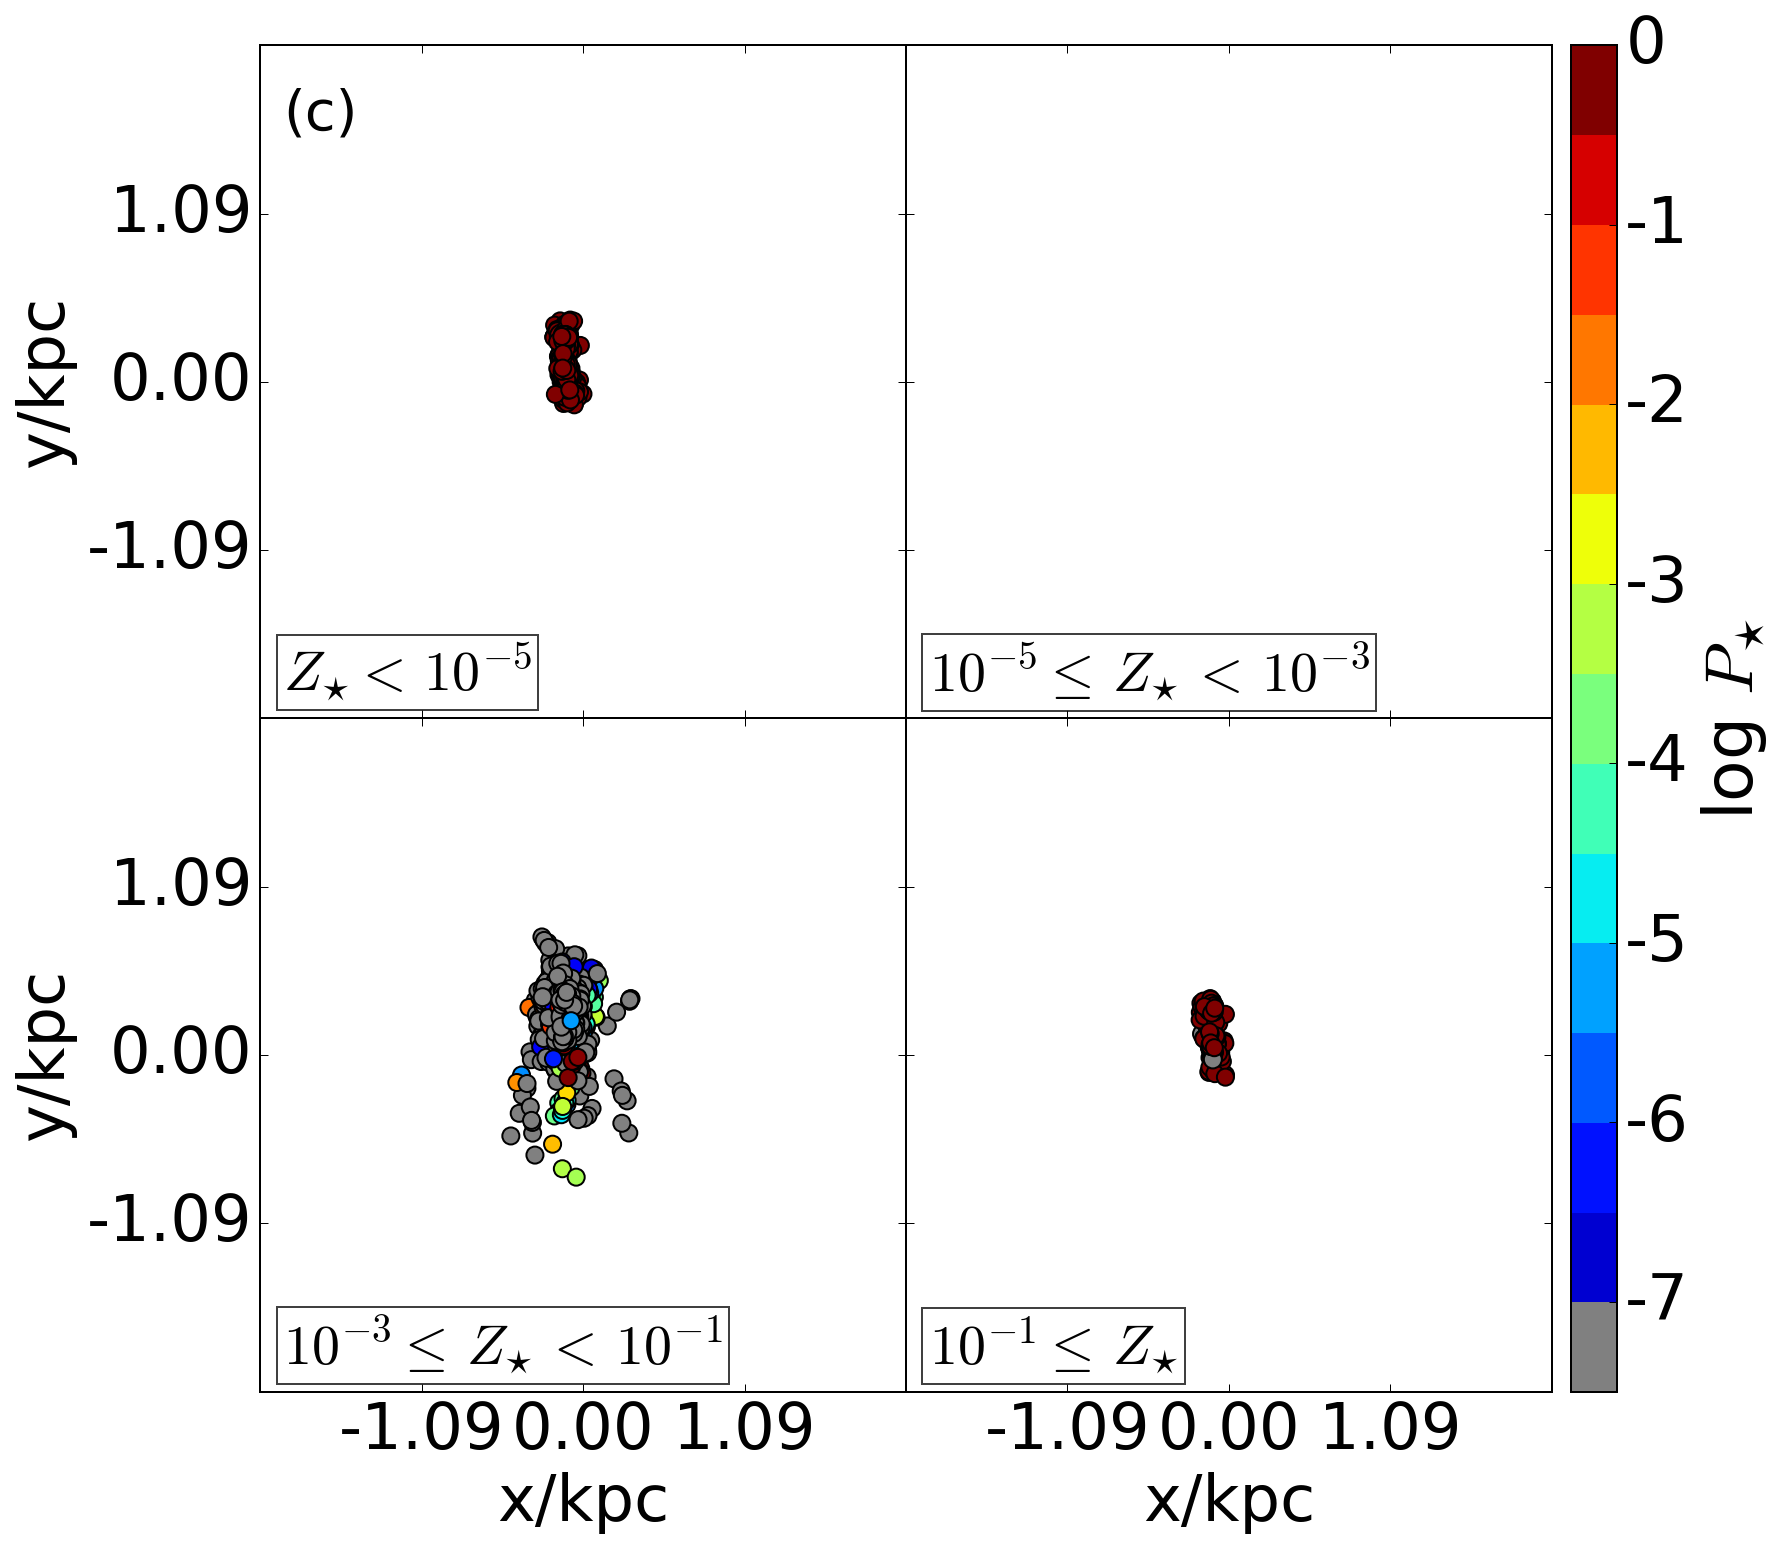

In [257]:
#rng1 = (PPF < 1.e-5)
#rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
#rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
#rng4 = (PPF >= 1.e-1)
# Use Z cuts for PPF data... 
z1=np.log10(haloPPF[rngf1])
z2=np.log10(haloPPF[rngf2])
z3=np.log10(haloPPF[rngf3])
z4=np.log10(haloPPF[rngf4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=halomass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=halomass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=halomass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=halomass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, Z_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, Z_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


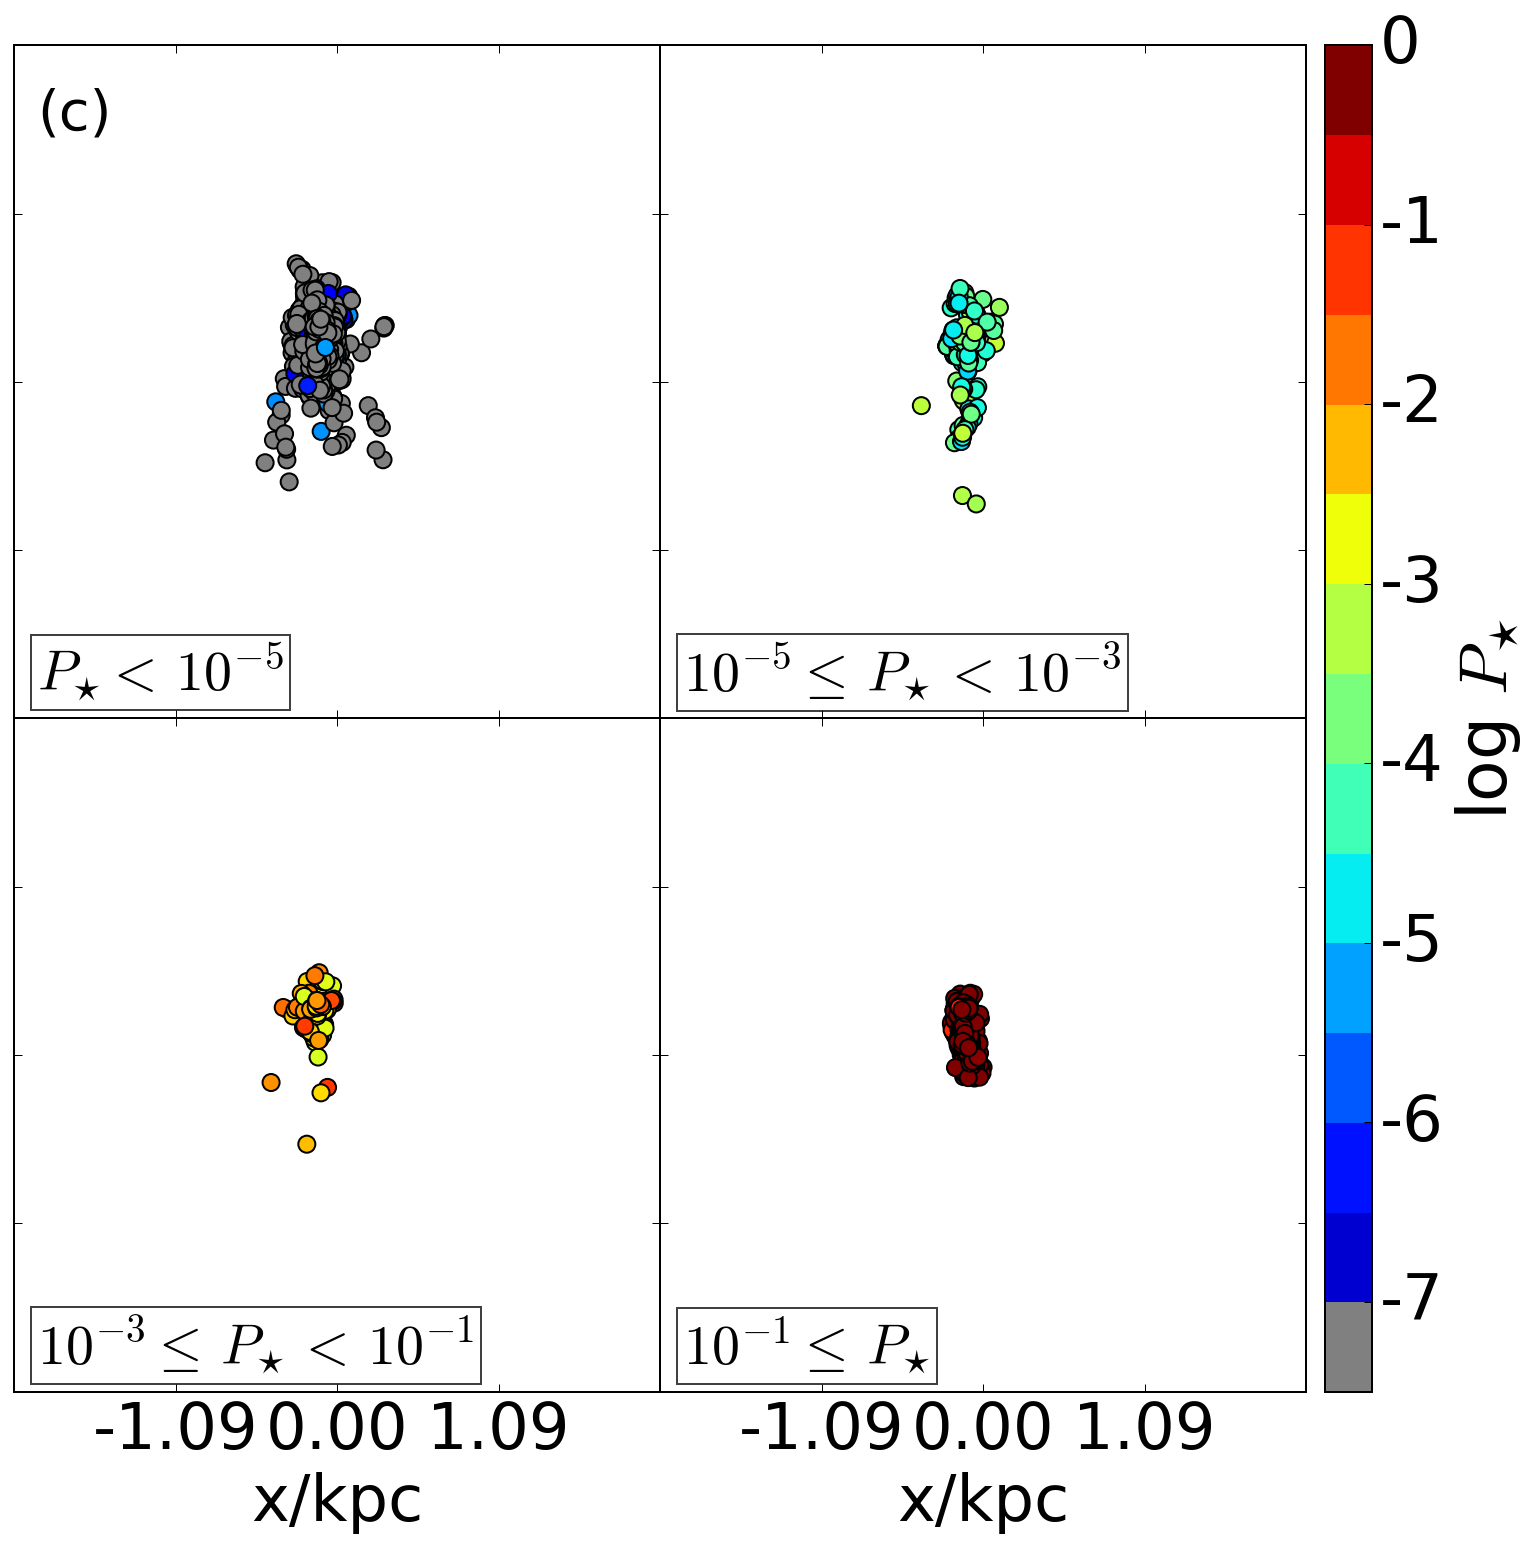

In [259]:
rng1 = (haloPPF <= 1.e-5)
rng2 = ((haloPPF > 1.e-5) & (haloPPF <= 1.e-3))
rng3 = ((haloPPF > 1.e-3) & (haloPPF <= 1.e-1))
rng4 = (haloPPF > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(haloPPF[rng1])
z2=np.log10(haloPPF[rng2])
z3=np.log10(haloPPF[rng3])
z4=np.log10(haloPPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax2.yaxis.set_ticks(tics); ax2.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)
ax4.yaxis.set_ticks(tics); ax4.yaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)


ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
rng1 = (haloPPF <= 1.e-5)
rng2 = ((haloPPF > 1.e-5) & (haloPPF <= 1.e-3))
rng3 = ((haloPPF > 1.e-3) & (haloPPF <= 1.e-1))
rng4 = (haloPPF > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(haloPPF[rng1])
z2=np.log10(haloPPF[rng2])
z3=np.log10(haloPPF[rng3])
z4=np.log10(haloPPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax4.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax4.text(xpos,ypos,'$P_{\star} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-5} \leq\, P_{\star}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-3} \leq\, P_{\star}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax1.text(xpos,ypos,'$10^{-1} \leq\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

#ax1.yaxis.set_ticks([]); ax1.yaxis.set_major_formatter(formatter)
#ax3.yaxis.set_ticks([]); ax3.yaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
gc.collect()



(-2.1846153846153848, 2.1846153846153848)
-4.36923076923
4.36923076923


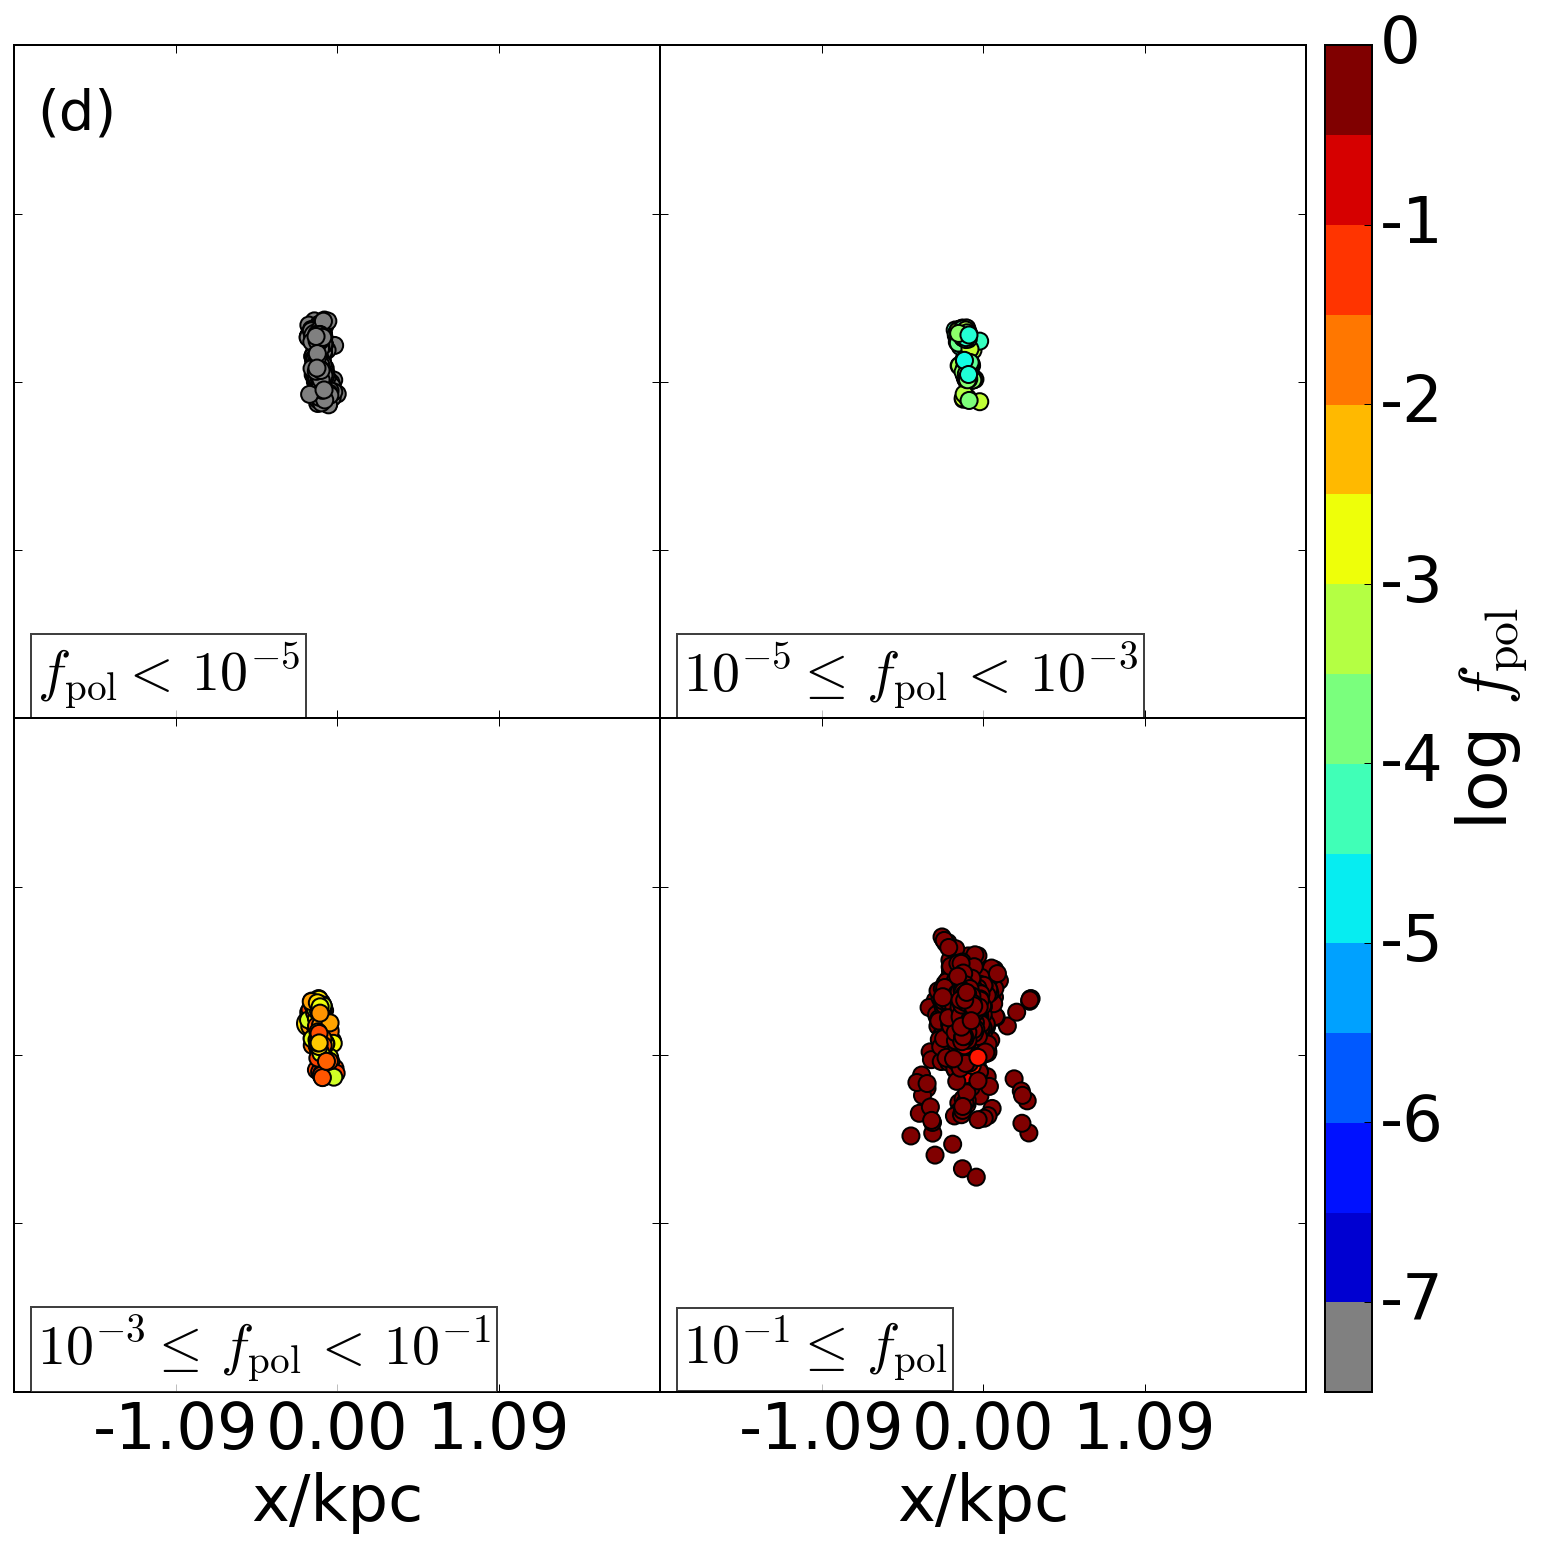

In [261]:
# Plotting fpol: a particle that is 99% pristine falls in P >= .1 ... 
# But that same particle is 1-.99 = 0.01 polluted ... and falls in 0.001 <= fpol < 0.1
halofpol[halofpol < 1e-7] = 10**-7.5
rng1 = (halofpol <= 1.e-5)
rng2 = ((halofpol > 1.e-5) & (halofpol <= 1.e-3))
rng3 = ((halofpol > 1.e-3) & (halofpol <= 1.e-1))
rng4 = (halofpol > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(halofpol[rng1])
z2=np.log10(halofpol[rng2])
z3=np.log10(halofpol[rng3])
z4=np.log10(halofpol[rng4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = haloStars[:,0]; ycoord = haloStars[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=halomass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=halomass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=halomass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=halomass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,r'$f_{\rm pol} <\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,r'$10^{-5} \leq\, f_{\rm pol}\, <\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,r'$10^{-3} \leq\, f_{\rm pol}\, <\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,r'$10^{-1} \leq\, f_{\rm pol}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(d)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $f_{\rm pol}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_fpol_locs_fpolcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()